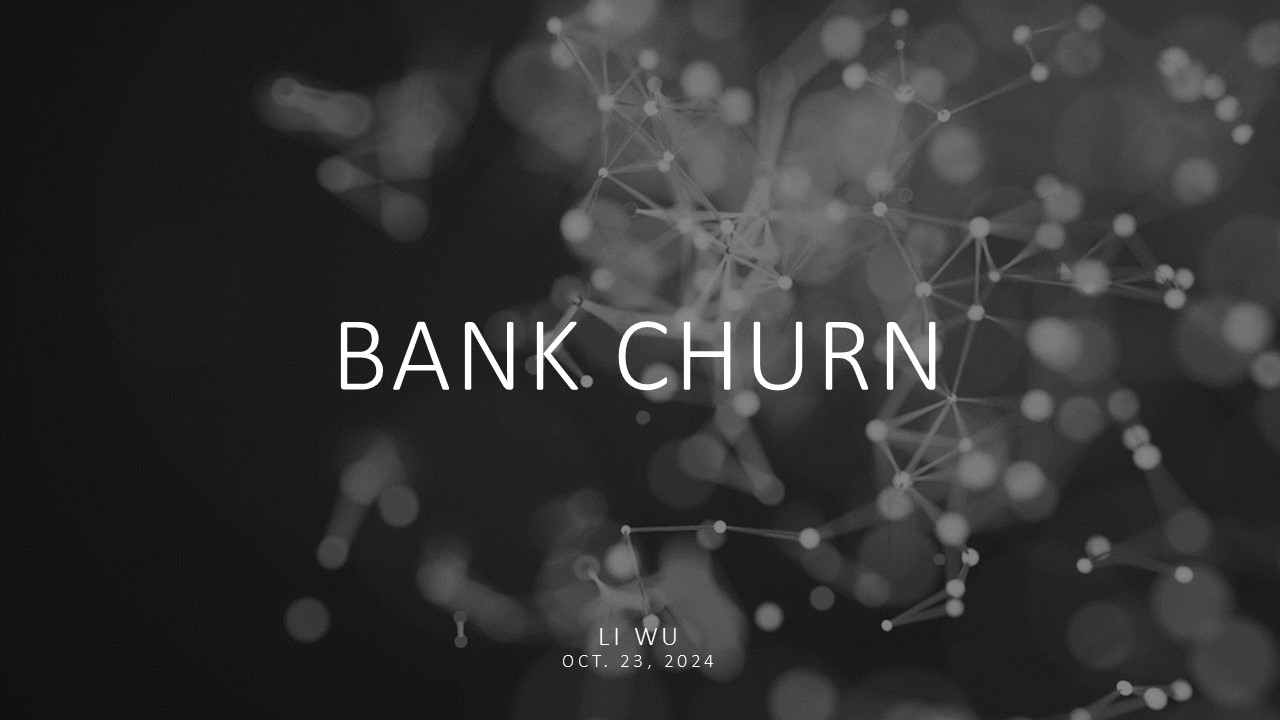

### __Customer Churn__ refers to the percentage of customers that stop using a business's products or services over a specific period of time due to several factors. It is extremely crucial to satisfy customers and keep them coming back to your organization since acquiring new customers is a costlier process than maintaining the regular ones. This problem of customer attrition (churn) can be solved or at least minimized by gap analysis and making informed data driven decisions.

### The goal is to analyze the bank customer churn data to determine which factors influence and why customers are leaving the service. By understanding these factors, we aim to implement targeted strategies to reduce churn and improve customer retention.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Import the dataset: Load the data into your analysis environment.

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

# 2. Display records: Show the first 5 and last 5 records of the dataset.

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# 3. Identify data types: Check and note the data types for each variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

# 4. Missing entries: Determine the number of missing entries per variable.

In [6]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# 5. Duplicate records: Identify and count any duplicate records.

In [7]:
df.duplicated().sum()

0

In [8]:
df_original = df.copy()

In [9]:
df.rename(columns={'Satisfaction Score': 'SatisfactionScore', 'Card Type': 'CardType', 'Point Earned':'PointEarned'}, inplace=True)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'SatisfactionScore', 'CardType', 'PointEarned'],
      dtype='object')

In [11]:
df = df[['Geography','Gender','Age','EstimatedSalary','Balance','CardType', 'Tenure',
        'CreditScore','HasCrCard','PointEarned','NumOfProducts','IsActiveMember','SatisfactionScore','Complain','Exited']]
df

,Geography,Gender,Age,EstimatedSalary,Balance,CardType,Tenure,CreditScore,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Exited
0,France,Female,42,101348.88,0.00,DIAMOND,2,619,1,464,1,1,2,1,1
1,Spain,Female,41,112542.58,83807.86,DIAMOND,1,608,0,456,1,1,3,1,0
2,France,Female,42,113931.57,159660.80,DIAMOND,8,502,1,377,3,0,3,1,1
3,France,Female,39,93826.63,0.00,GOLD,1,699,0,350,2,0,5,0,0
4,Spain,Female,43,79084.10,125510.82,GOLD,2,850,1,425,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,96270.64,0.00,DIAMOND,5,771,1,300,2,0,1,0,0
9996,France,Male,35,101699.77,57369.61,PLATINUM,10,516,1,771,1,1,5,0,0
9997,France,Female,36,42085.58,0.00,SILVER,7,709,0,564,1,1,3,1,1
9998,Germany,Male,42,92888.52,75075.31,GOLD,3,772,1,339,2,0,2,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography          10000 non-null  object 
 1   Gender             10000 non-null  object 
 2   Age                10000 non-null  int64  
 3   EstimatedSalary    10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   CardType           10000 non-null  object 
 6   Tenure             10000 non-null  int64  
 7   CreditScore        10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   PointEarned        10000 non-null  int64  
 10  NumOfProducts      10000 non-null  int64  
 11  IsActiveMember     10000 non-null  int64  
 12  SatisfactionScore  10000 non-null  int64  
 13  Complain           10000 non-null  int64  
 14  Exited             10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


# 6. Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

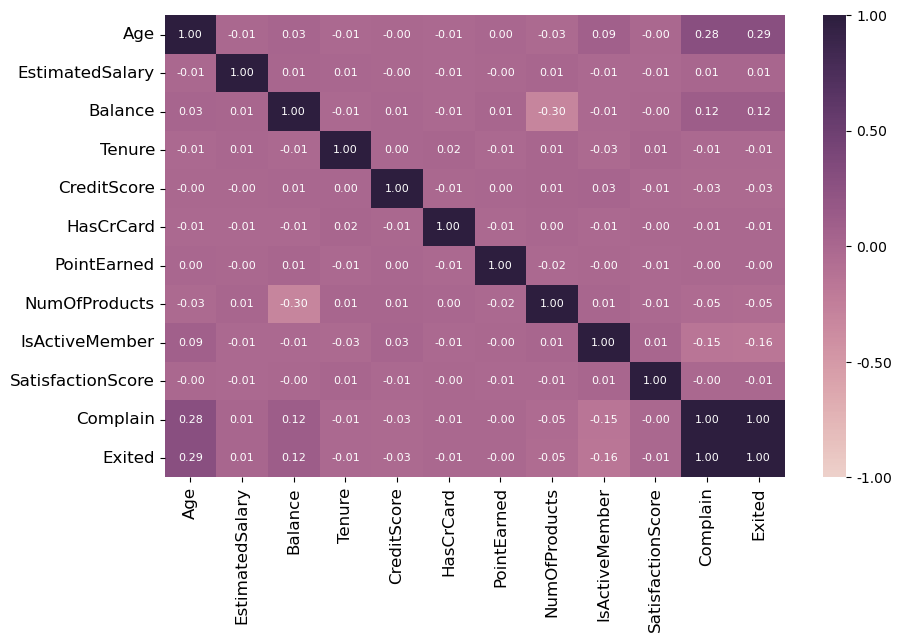

In [13]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(numeric_only=True), vmin=-1, fmt='.2f', annot=True, annot_kws={"size": 8}, cmap=sns.cubehelix_palette(as_cmap=True),cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1], 'format': '%.2f'})
cbar = plt.gcf().axes[-1] 
cbar.tick_params(labelsize=10) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Since "Complain" and "Exited" has a perfect corrrelation, I will drop the "Complain" column.

In [14]:
df = df.drop(columns='Complain')

# EDA : Univariate Analysis

## Categorical Variables

In [15]:
cat_col = ['Geography','Gender','CardType','HasCrCard','NumOfProducts','IsActiveMember','SatisfactionScore','Exited']
for col in df[cat_col]:
    print(df[col].value_counts())
    print('*'*40)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
****************************************
Gender
Male      5457
Female    4543
Name: count, dtype: int64
****************************************
CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
****************************************
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
****************************************
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
****************************************
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
****************************************
SatisfactionScore
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64
****************************************
Exited
0    7962
1    2038
Name: count, dtype: int64
****************************************


In [16]:
df[cat_col].describe(exclude=['int','float'])

,Geography,Gender,CardType
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


### 1) Geography

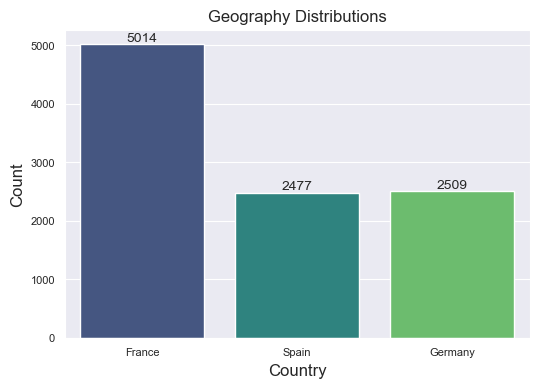

In [17]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

ax = sns.countplot(data=df, x='Geography', hue='Geography',palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel("Country", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Geography Distributions')

plt.show()

### 2) Gender

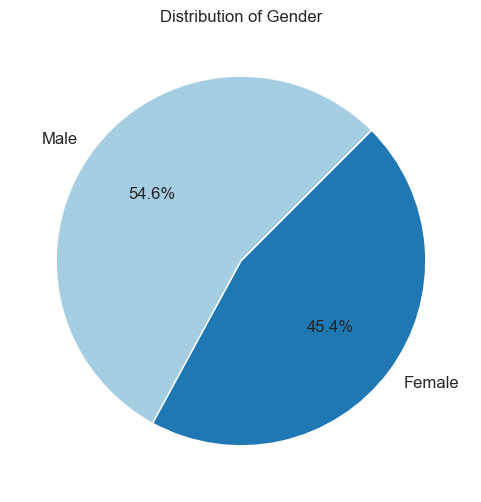

In [18]:
plt.figure(figsize=(6, 6))

gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})
plt.title('Distribution of Gender')

plt.show()

### 3) CardType

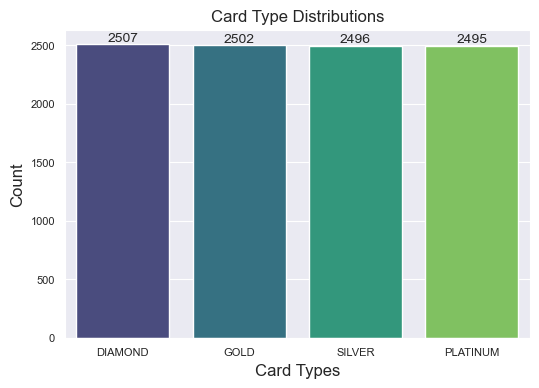

In [19]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

ax = sns.countplot(data=df, x='CardType', hue='CardType', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel("Card Types", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Card Type Distributions')

plt.show()

### 4) HasCrCard

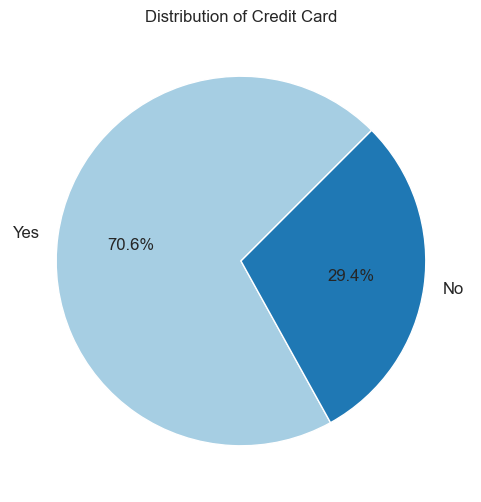

In [20]:
plt.figure(figsize=(6, 6))

CrCard_counts = df['HasCrCard'].value_counts()
plt.pie(CrCard_counts, labels=['Yes','No'], autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})
plt.title('Distribution of Credit Card')

plt.show()

### 5) NumOfProducts

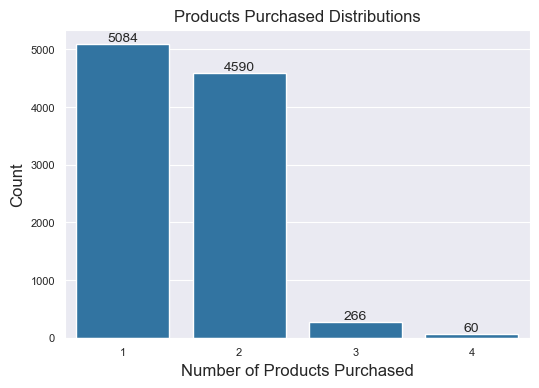

In [21]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

ax = sns.countplot(data=df, x='NumOfProducts')
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel("Number of Products Purchased", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Products Purchased Distributions')

plt.show()

### 6) IsActiveMember

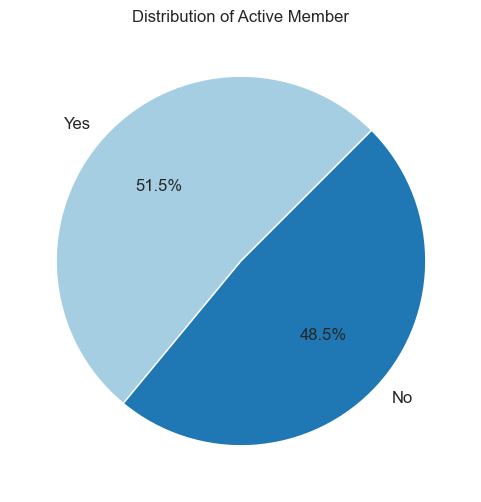

In [22]:
plt.figure(figsize=(6, 6))

Act_counts = df['IsActiveMember'].value_counts()
plt.pie(Act_counts, labels=['Yes','No'], autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})
plt.title('Distribution of Active Member')

plt.show()

### 7) SatisfactionScore

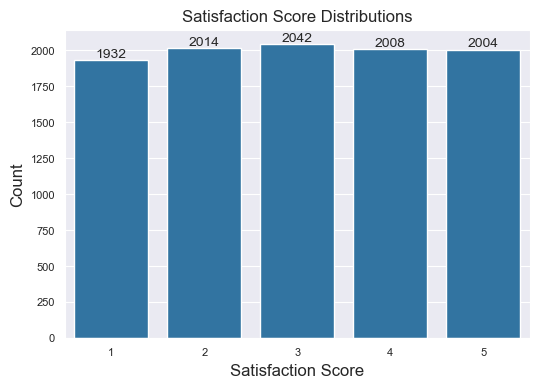

In [23]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

ax = sns.countplot(data=df, x='SatisfactionScore')
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel("Satisfaction Score", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Satisfaction Score Distributions')

plt.show()

### 8) Exited (Target Variable)

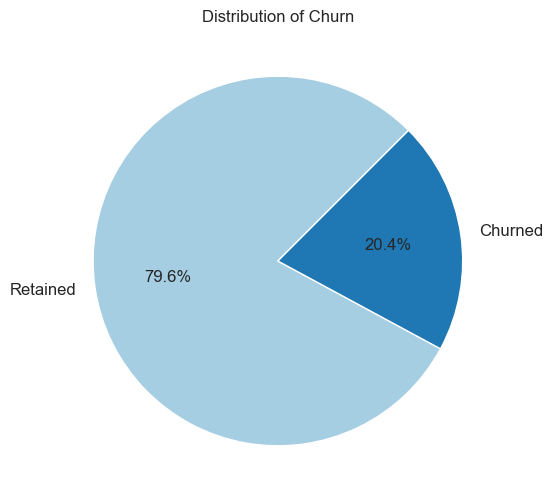

In [24]:
plt.figure(figsize=(6, 6))

Exited_counts = df['Exited'].value_counts()
plt.pie(Exited_counts, labels=['Retained','Churned'], autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})
plt.title('Distribution of Churn')

plt.show()

## Numerical Variables

In [25]:
df[['Age', 'EstimatedSalary', 'Balance', 'Tenure', 'CreditScore','PointEarned']].describe()

,Age,EstimatedSalary,Balance,Tenure,CreditScore,PointEarned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,100090.239881,76485.889288,5.012800,650.528800,606.515100
std,10.487806,57510.492818,62397.405202,2.892174,96.653299,225.924839
min,18.000000,11.580000,0.000000,0.000000,350.000000,119.000000
25%,32.000000,51002.110000,0.000000,3.000000,584.000000,410.000000
50%,37.000000,100193.915000,97198.540000,5.000000,652.000000,605.000000
75%,44.000000,149388.247500,127644.240000,7.000000,718.000000,801.000000
max,92.000000,199992.480000,250898.090000,10.000000,850.000000,1000.000000


In [26]:
df.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

# 7. Outlier detection: Use the Tukey method to identify outliers.

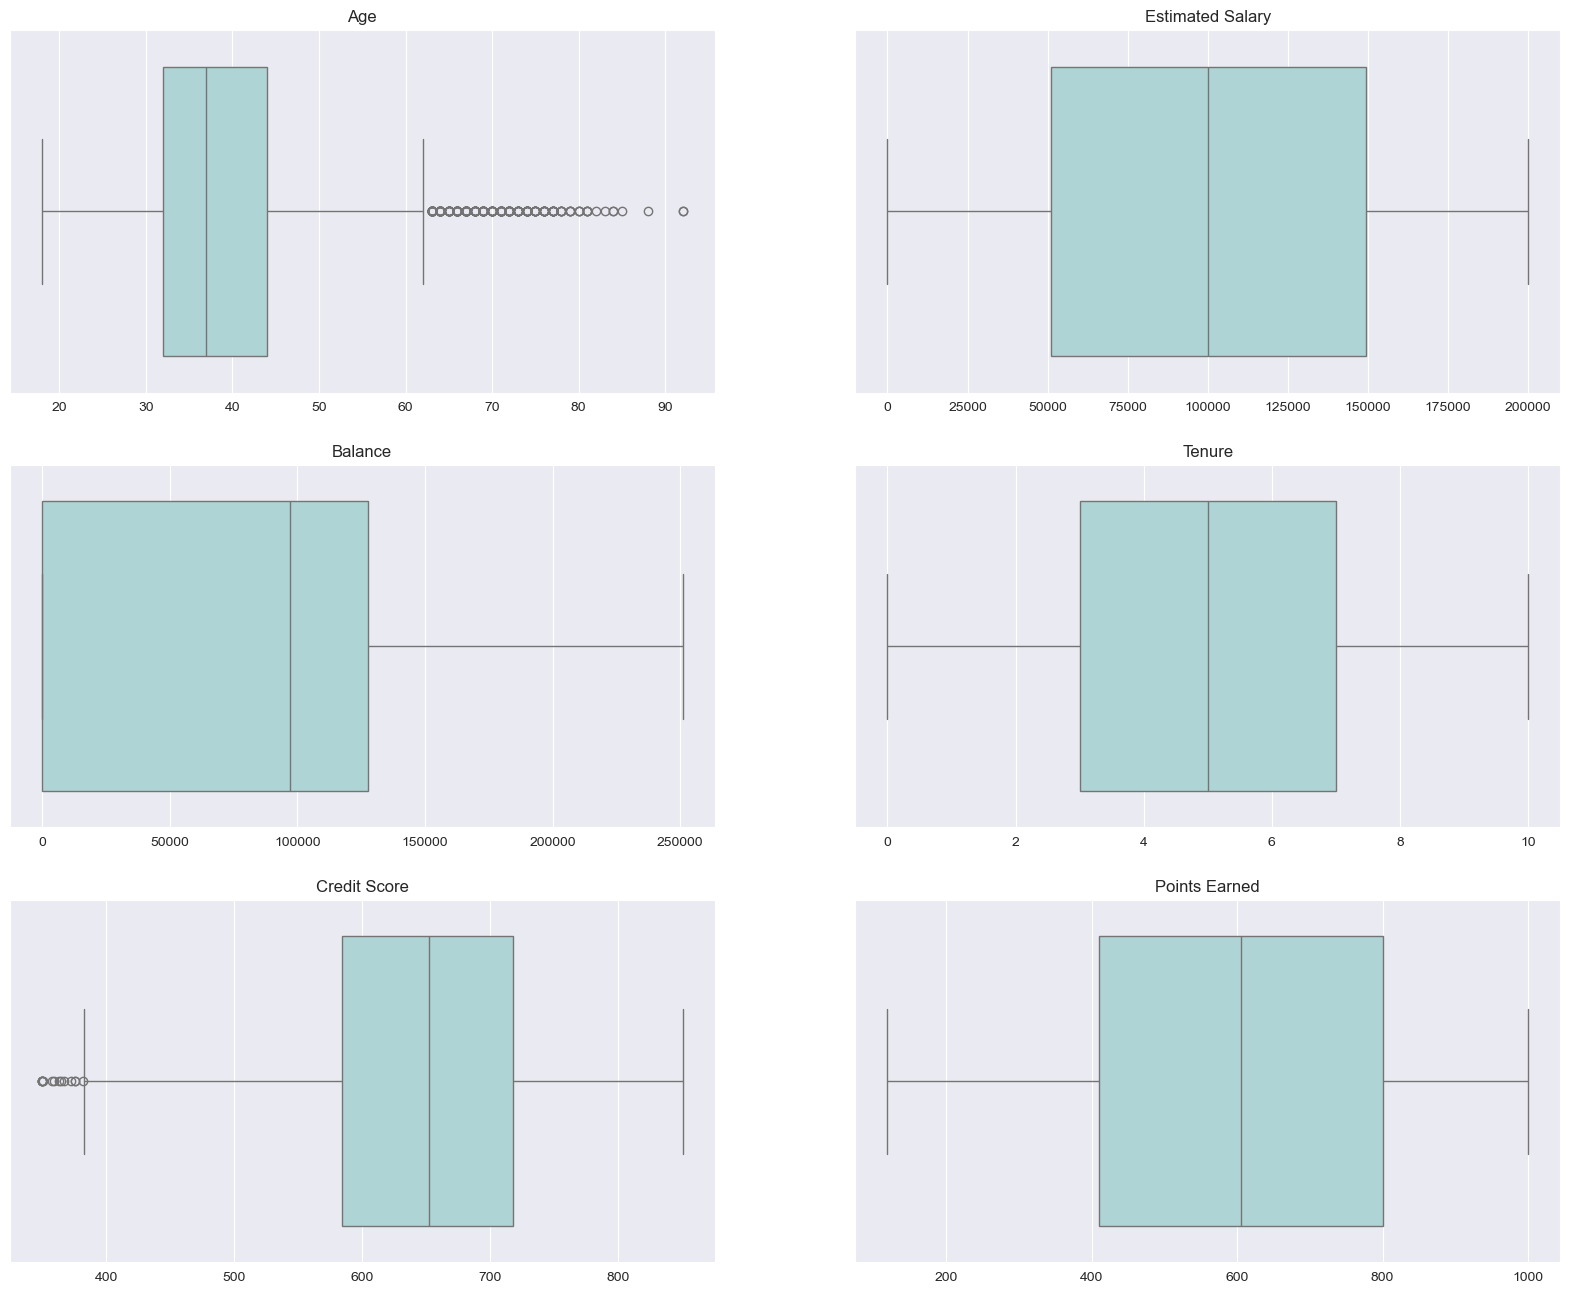

In [27]:
fig, ax = plt.subplots(3,2, figsize=(20,16))
sns.set_style("darkgrid")

sns.boxplot(x=df['Age'],ax=ax[0,0],color='#a8dadc')
ax[0,0].set_xlabel('')
ax[0,0].set_title('Age')

sns.boxplot(x=df['EstimatedSalary'],ax=ax[0,1],color='#a8dadc')
ax[0,1].set_xlabel('')
ax[0,1].set_title('Estimated Salary')

sns.boxplot(x=df['Balance'],ax=ax[1,0],color='#a8dadc')
ax[1,0].set_xlabel('')
ax[1,0].set_title('Balance')

sns.boxplot(x=df['Tenure'],ax=ax[1,1],color='#a8dadc')
ax[1,1].set_xlabel('')
ax[1,1].set_title('Tenure')

sns.boxplot(x=df['CreditScore'],ax=ax[2,0],color='#a8dadc')
ax[2,0].set_xlabel('')
ax[2,0].set_title('Credit Score')

sns.boxplot(x=df['PointEarned'],ax=ax[2,1],color='#a8dadc')
ax[2,1].set_xlabel('')
ax[2,1].set_title('Points Earned')

for axis in ax.flat:
    axis.tick_params(axis='x', labelsize=10)

plt.show()

### 1) Age              

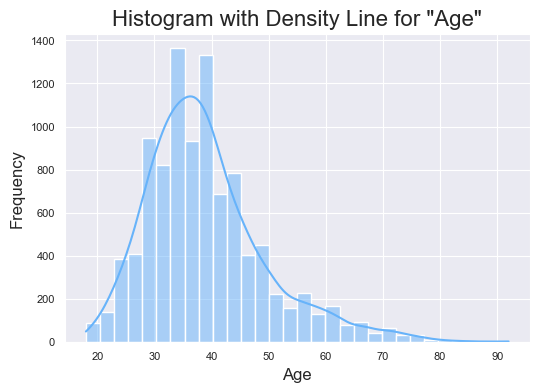

In [59]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

sns.histplot(df['Age'], bins=30, kde=True, color='#67B3FA')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Histogram with Density Line for "Age"', fontsize=16)

plt.show()

### 2) EstimatedSalary    

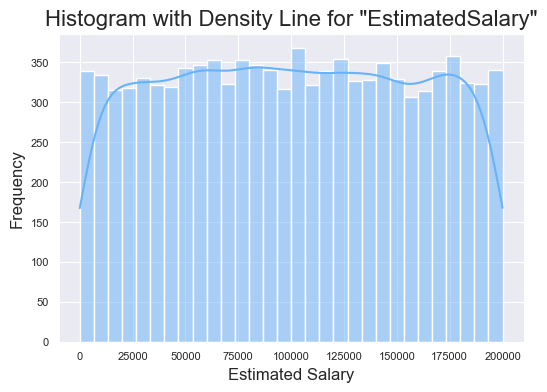

In [61]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='#67B3FA')

plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Histogram with Density Line for "EstimatedSalary"', fontsize=16)

plt.show()

### 3) Balance          

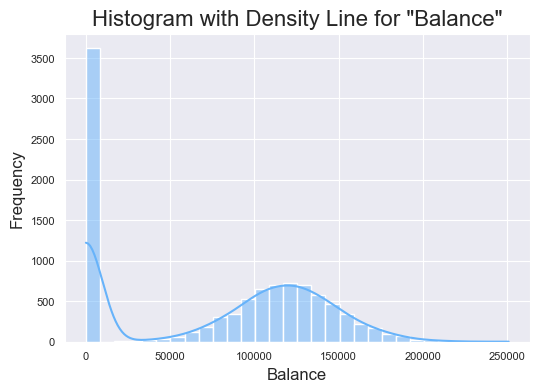

In [62]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

sns.histplot(df['Balance'], bins=30, kde=True, color='#67B3FA')

plt.xlabel('Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Histogram with Density Line for "Balance"', fontsize=16)

plt.show()

### 4) Tenure

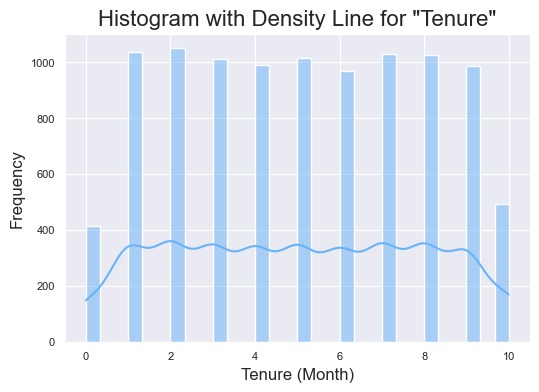

In [63]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

sns.histplot(df['Tenure'], bins=30, kde=True, color='#67B3FA')

plt.xlabel('Tenure (Month)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Histogram with Density Line for "Tenure"', fontsize=16)

plt.show()

### 5) CreditScore

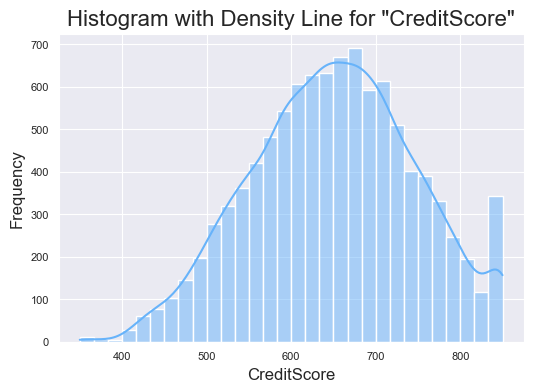

In [64]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

sns.histplot(df['CreditScore'], bins=30, kde=True, color='#67B3FA')

plt.xlabel('CreditScore', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Histogram with Density Line for "CreditScore"', fontsize=16)

plt.show()

### 6) PointEarned

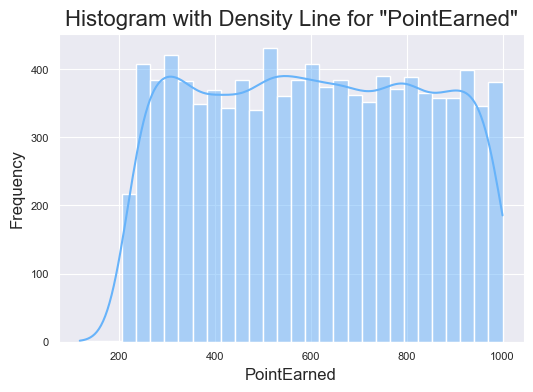

In [65]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")

sns.histplot(df['PointEarned'], bins=30, kde=True, color='#67B3FA')

plt.xlabel('PointEarned', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Histogram with Density Line for "PointEarned"', fontsize=16)

plt.show()

# 8. Bivariate analysis: Perform at least one analysis for each of the following hypothesis tests:

## 1) Chi-Square test (Categorical vs Categorial)

### "Geography" vs "Exited"

In [62]:
crosstab = pd.crosstab(df['Geography'], df['Exited'], margins=True)
crosstab

Exited,0,1,All
Geography,,,
France,4203,811,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7962,2038,10000


<Figure size 1000x800 with 0 Axes>

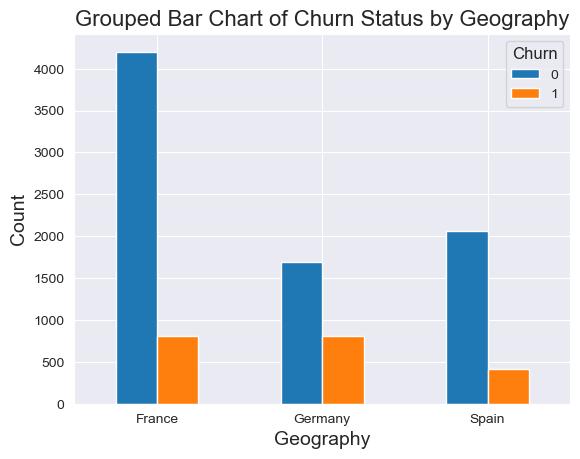

In [63]:
crosstab_plot = pd.crosstab(df['Geography'], df['Exited'])

plt.figure(figsize=(10, 8))

crosstab_plot.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

plt.title('Grouped Bar Chart of Churn Status by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(title="Churn", title_fontsize='12', fontsize='10')

plt.show()

In [64]:
def chi_square(df,c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = True))
    print("="*100)
    
    print("Expected values: \n")
    print(exp_val)
    print("="*100)

    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    
    if exp_val.min()<5 or np.sum(exp_val)<30 : 
        print("\nWarning :We have some small expected values or the total number of observations is not enough to get any conclusion\n")
    elif p_val < 0.05:
        print(f'\nThere is statistically significant association between "{c1}" and "{c2}" at 0.05 significant level.')
    else:
        print(f"""\nThere is no association between the two variables.\nWe don't have enough evidence to conclude there is a statistically significant relationship between "{c1}" and "{c2}".""")   

In [65]:
chi_square(df,'Geography','Exited')

Actual values:

Exited        0     1    All
Geography                   
France     4203   811   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7962  2038  10000
Expected values: 

[[3992.1468 1021.8532]
 [1997.6658  511.3342]
 [1972.1874  504.8126]]

Chi-square is : 300.6264011211942 

p_value is : 5.245736109572763e-66 

degree of freedom is :2

There is statistically significant association between "Geography" and "Exited" at 0.05 significant level.


In [66]:
chi_square(df,'Gender','Exited')

Actual values:

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4558   899   5457
All     7962  2038  10000
Expected values: 

[[3617.1366  925.8634]
 [4344.8634 1112.1366]]

Chi-square is : 112.39655374778587 

p_value is : 2.9253677618642e-26 

degree of freedom is :1

There is statistically significant association between "Gender" and "Exited" at 0.05 significant level.


In [67]:
chi_square(df,'CardType','Exited')

Actual values:

Exited       0     1    All
CardType                   
DIAMOND   1961   546   2507
GOLD      2020   482   2502
PLATINUM  1987   508   2495
SILVER    1994   502   2496
All       7962  2038  10000
Expected values: 

[[1996.0734  510.9266]
 [1992.0924  509.9076]
 [1986.519   508.481 ]
 [1987.3152  508.6848]]

Chi-square is : 5.053223027060927 

p_value is : 0.16794112067810177 

degree of freedom is :3

There is no association between the two variables.
We don't have enough evidence to conclude there is a statistically significant relationship between "CardType" and "Exited".


In [68]:
chi_square(df,'NumOfProducts','Exited')

Actual values:

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4241   349   4590
3                46   220    266
4                 0    60     60
All            7962  2038  10000
Expected values: 

[[4047.8808 1036.1192]
 [3654.558   935.442 ]
 [ 211.7892   54.2108]
 [  47.772    12.228 ]]

Chi-square is : 1501.5048306588592 

p_value is : 0.0 

degree of freedom is :3

There is statistically significant association between "NumOfProducts" and "Exited" at 0.05 significant level.


In [69]:
chi_square(df,'SatisfactionScore','Exited')

Actual values:

Exited                0     1    All
SatisfactionScore                   
1                  1545   387   1932
2                  1575   439   2014
3                  1641   401   2042
4                  1594   414   2008
5                  1607   397   2004
All                7962  2038  10000
Expected values: 

[[1538.2584  393.7416]
 [1603.5468  410.4532]
 [1625.8404  416.1596]
 [1598.7696  409.2304]
 [1595.5848  408.4152]]

Chi-square is : 3.8027035326309577 

p_value is : 0.43336497327743106 

degree of freedom is :4

There is no association between the two variables.
We don't have enough evidence to conclude there is a statistically significant relationship between "SatisfactionScore" and "Exited".


In [76]:
cat_cols = ['Geography','Gender','CardType','HasCrCard','NumOfProducts','IsActiveMember','SatisfactionScore']
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        col1 = cat_cols[i]
        col2 = cat_cols[j]
        crosstab = pd.crosstab(df[col1],df[col2])
        chi2, p_val, dof, expected = chi2_contingency(crosstab)

        if p_val < 0.05:
            print(f'Significant Association btw "{col1}" & "{col2}" (pvalue={p_val:.4f})')

Significant Association btw "Geography" & "Gender" (pvalue=0.0315)
Significant Association btw "Geography" & "NumOfProducts" (pvalue=0.0000)
Significant Association btw "Gender" & "CardType" (pvalue=0.0073)
Significant Association btw "Gender" & "NumOfProducts" (pvalue=0.0001)
Significant Association btw "Gender" & "IsActiveMember" (pvalue=0.0255)
Significant Association btw "NumOfProducts" & "IsActiveMember" (pvalue=0.0006)


In [117]:
def cramers_v(contingency_table):
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total number of observations
    r, k = contingency_table.shape     # Number of rows and columns
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

        
contingency_table = pd.crosstab(df['Geography'], df['Gender'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: Geography & Gender {cramers_v_value}")

contingency_table = pd.crosstab(df['Geography'], df['NumOfProducts'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: Geography & NumOfProducts {cramers_v_value}")

contingency_table = pd.crosstab(df['Gender'], df['CardType'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: Gender & CardType {cramers_v_value}")

contingency_table = pd.crosstab(df['Gender'], df['NumOfProducts'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: Gender & NumOfProducts {cramers_v_value}")

contingency_table = pd.crosstab(df['Gender'], df['IsActiveMember'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: Gender & IsActiveMember {cramers_v_value}")

contingency_table = pd.crosstab(df['NumOfProducts'], df['IsActiveMember'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: NumOfProducts & IsActiveMember {cramers_v_value}")


# Interpreting Cramér’s V:
# 0 to 0.1: Weak association
# 0.1 to 0.3: Moderate association
# 0.3 to 0.5: Strong association
# > 0.5: Very strong association

Cramér's V: Geography & Gender 0.026302394601444515
Cramér's V: Geography & NumOfProducts 0.04961966677611565
Cramér's V: Gender & CardType 0.03467057065071019
Cramér's V: Gender & NumOfProducts 0.045262682262762824
Cramér's V: Gender & IsActiveMember 0.0223433923353957
Cramér's V: NumOfProducts & IsActiveMember 0.041465780314221004


In [77]:
cat_cols = ['Geography','Gender','CardType','HasCrCard','NumOfProducts','IsActiveMember','SatisfactionScore']
for i in df[cat_cols]:
    crosstab = pd.crosstab(df[i],df['Exited'])
    chi2, p_val, dof, expected = chi2_contingency(crosstab)

    if p_val < 0.05:
        print(f'Significant Association btw "{i}" & "Exited" (pvalue={p_val:.4f})')

Significant Association btw "Geography" & "Exited" (pvalue=0.0000)
Significant Association btw "Gender" & "Exited" (pvalue=0.0000)
Significant Association btw "NumOfProducts" & "Exited" (pvalue=0.0000)
Significant Association btw "IsActiveMember" & "Exited" (pvalue=0.0000)


<Figure size 1000x800 with 0 Axes>

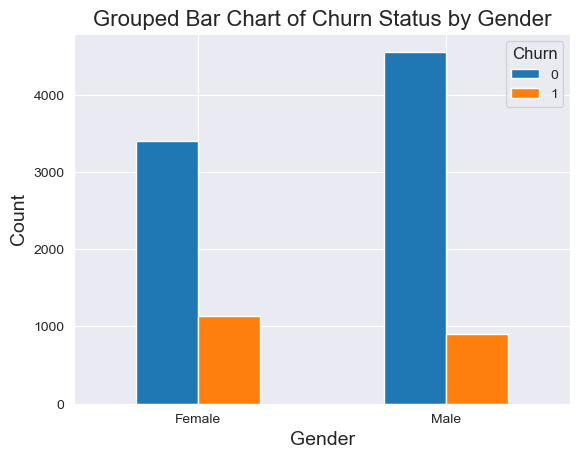

In [78]:
crosstab_plot = pd.crosstab(df['Gender'], df['Exited'])

plt.figure(figsize=(10, 8))

crosstab_plot.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

plt.title('Grouped Bar Chart of Churn Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(title="Churn", title_fontsize='12', fontsize='10')

plt.show()

<Figure size 1000x800 with 0 Axes>

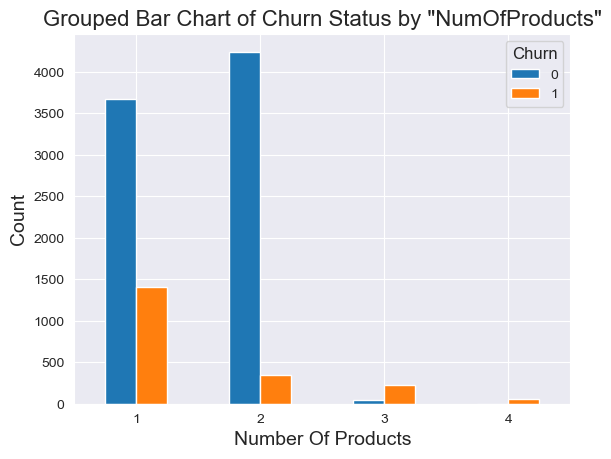

In [80]:
crosstab_plot = pd.crosstab(df['NumOfProducts'], df['Exited'])

plt.figure(figsize=(10, 8))

crosstab_plot.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

plt.title('Grouped Bar Chart of Churn Status by "NumOfProducts"', fontsize=16)
plt.xlabel('Number Of Products', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(title="Churn", title_fontsize='12', fontsize='10')

plt.show()

<Figure size 1000x800 with 0 Axes>

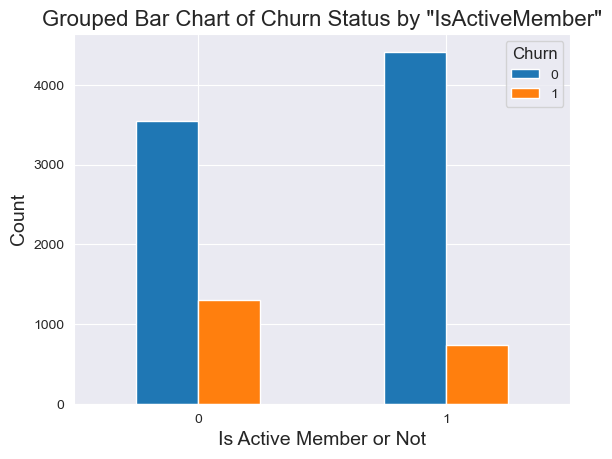

In [81]:
crosstab_plot = pd.crosstab(df['IsActiveMember'], df['Exited'])

plt.figure(figsize=(10, 8))

crosstab_plot.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

plt.title('Grouped Bar Chart of Churn Status by "IsActiveMember"', fontsize=16)
plt.xlabel('Is Active Member or Not', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(title="Churn", title_fontsize='12', fontsize='10')

plt.show()

## 2) Correlation (Continuous vs Continuous)

In [84]:
num_corr = df[['Age','EstimatedSalary','Balance','Tenure','CreditScore','PointEarned']].corr()
num_corr

,Age,EstimatedSalary,Balance,Tenure,CreditScore,PointEarned
Age,1.000000,-0.007201,0.028308,-0.009997,-0.003965,0.002222
EstimatedSalary,-0.007201,1.000000,0.012797,0.007784,-0.001384,-0.001515
Balance,0.028308,0.012797,1.000000,-0.012254,0.006268,0.014608
Tenure,-0.009997,0.007784,-0.012254,1.000000,0.000842,-0.010196
CreditScore,-0.003965,-0.001384,0.006268,0.000842,1.000000,0.000077
PointEarned,0.002222,-0.001515,0.014608,-0.010196,0.000077,1.000000


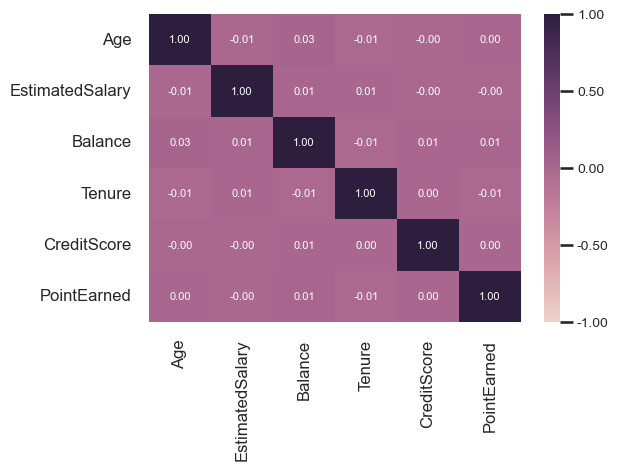

In [88]:
plt.figure(figsize=(6,4))

sns.heatmap(num_corr, vmin=-1, fmt='.2f', annot=True, annot_kws={"size": 8}, cmap=sns.cubehelix_palette(as_cmap=True),cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1], 'format': '%.2f'})
cbar = plt.gcf().axes[-1] 
cbar.tick_params(labelsize=10) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### "Age" vs "Balance"

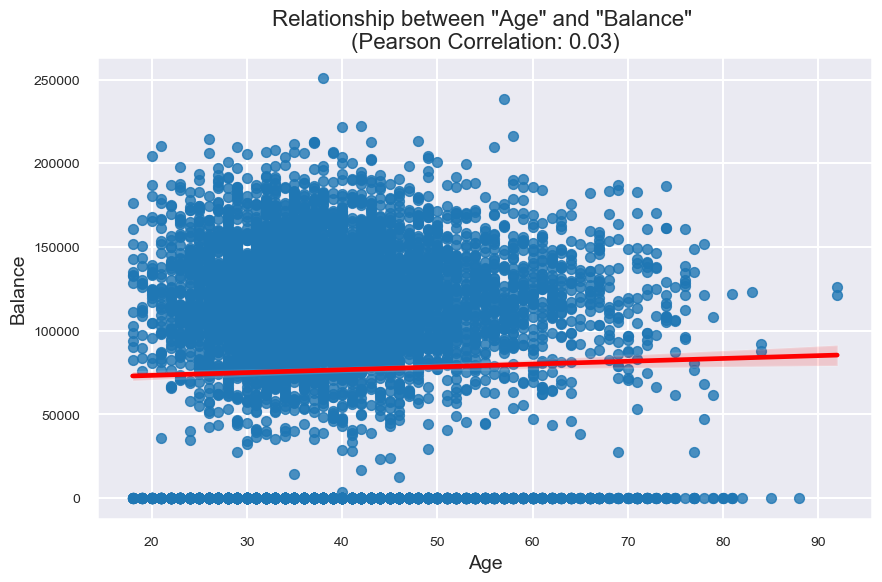

In [87]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.set_context('talk')

corr_matrix = df[['Age','Balance']].corr()
pearson_corr = corr_matrix.loc['Age', 'Balance']
sns.regplot(data=df, x='Age', y='Balance', scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title(f'Relationship between "Age" and "Balance" \n(Pearson Correlation: {pearson_corr:.2f})', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## 3) T-test or Mann-Whitney U test (Continuous vs Categorial-2 levels)

### "CreditScore" vs "Churn"

#### *Check the Assumptions of the Two-Sample T-test*

#### a) Independency: we have two independent groups (0 and 1)

In [89]:
churn = df.query('Exited==1')['CreditScore']
no_churn = df.query('Exited==0')['CreditScore']

In [90]:
churn

0       619
2       502
5       645
7       376
16      653
       ... 
9981    498
9982    655
9991    597
9997    709
9998    772
Name: CreditScore, Length: 2038, dtype: int64

In [91]:
no_churn

1       608
3       699
4       850
6       822
8       501
       ... 
9993    644
9994    800
9995    771
9996    516
9999    792
Name: CreditScore, Length: 7962, dtype: int64

#### b) Normality test and Outliers (Visualize the Data) - Grouped Boxplot

In [92]:
stats.normaltest(churn)

NormaltestResult(statistic=15.286400991932583, pvalue=0.0004792920225168572)

In [93]:
stats.normaltest(no_churn)

NormaltestResult(statistic=142.3164733741459, pvalue=1.2484480197905784e-31)

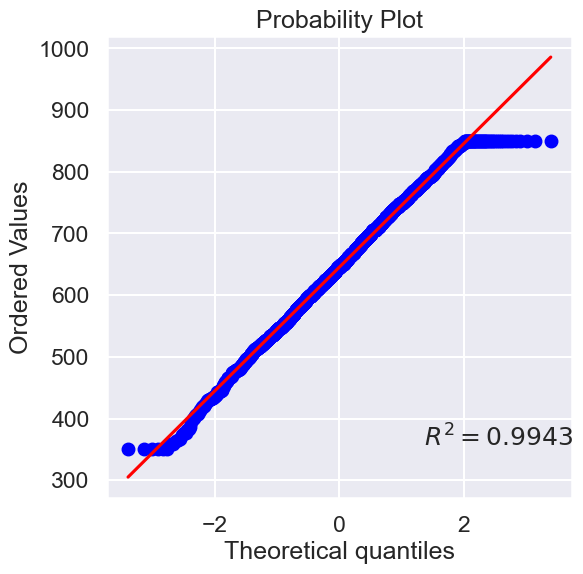

In [94]:
plt.figure(figsize=(6,6))
stats.probplot(churn, plot=plt, rvalue=True)

plt.show()

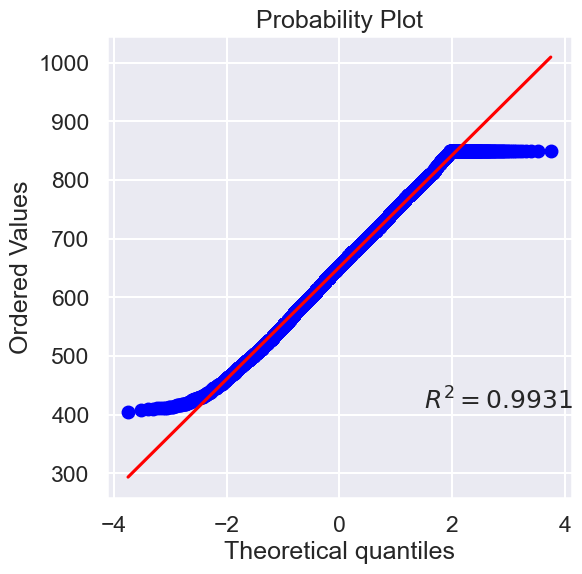

In [95]:
plt.figure(figsize=(6,6))
stats.probplot(no_churn, plot=plt, rvalue=True)

plt.show()

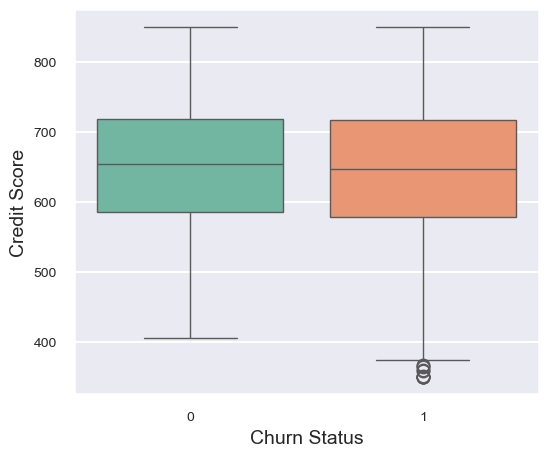

In [96]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.set_context('talk')

ax = sns.boxplot(data=df, x="Exited", hue="Exited", y="CreditScore", palette="Set2")

plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.get_legend().remove()
plt.show()

- __Normality Tests (p-value < 0.05):__ Both groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
- __Visual Evidence from Q-Q Plot:__ The Q-Q plot shows an excellent fit with R^2 close to 1, and there are not many outliers observed in the boxplot, suggesting the data closely follows a normal distribution.
- __Large Sample Size (CLT):__ With a large sample size, the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

#### c)  Homogeneity of Variances

In [97]:
stats.levene(churn, no_churn)

LeveneResult(statistic=5.616580271197907, pvalue=0.017810201526065078)

The Levene's test __p-value of 0.0178__ is less than 0.05, indicating unequal variances between the churn and no-churn groups. Therefore, we reject the assumption of equal variances and should consider using Welch's t-test.

#### d) Welch's T-test

In [98]:
stats.ttest_ind(churn, no_churn, equal_var=False)

TtestResult(statistic=-2.6030372644244175, pvalue=0.009284913465813381, df=3052.604723318706)

### Conclusion: The p-value is below the significance level (0.05), so we reject the null hypothesis and conclude that there is a statistically significant difference between the means of the churn and no-churn groups.

## 4) ANOVA test (Continuous vs Categorial >2 levels)

### "CreditScore" vs "CardType"

In [99]:
df.CardType.value_counts()

CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

#### a) Independency: 4 independent groups ("DIAMOND","GOLD","SILVER","PLATIUM")

In [100]:
diamond = df.query('CardType=="DIAMOND"')['CreditScore']
gold = df.query('CardType=="GOLD"')['CreditScore']
silver = df.query('CardType=="SILVER"')['CreditScore']
platium = df.query('CardType=="PLATINUM"')['CreditScore']

#### b) Normality test and Outliers (Visualize the Data) - Grouped Boxplot

In [101]:
stats.normaltest(diamond)

NormaltestResult(statistic=36.24698927905733, pvalue=1.3460657849363139e-08)

In [102]:
stats.normaltest(gold)

NormaltestResult(statistic=37.68510104852521, pvalue=6.558194344365536e-09)

In [103]:
stats.normaltest(silver)

NormaltestResult(statistic=30.810445819767473, pvalue=2.039842789823574e-07)

In [104]:
stats.normaltest(platium)

NormaltestResult(statistic=26.911165667040077, pvalue=1.4332258236239008e-06)

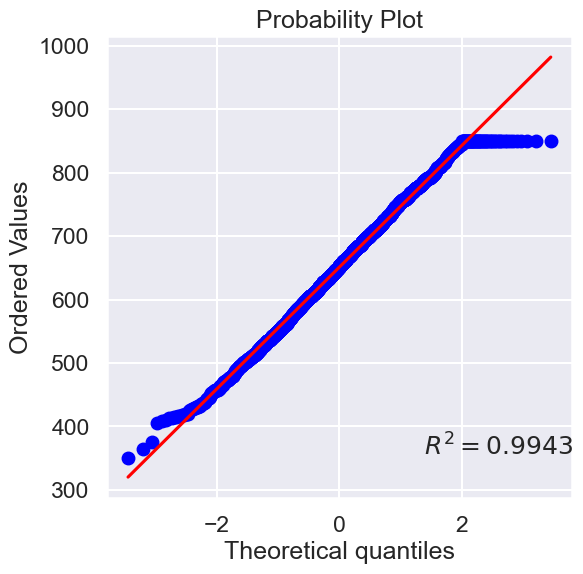

In [105]:
plt.figure(figsize=(6,6))
stats.probplot(diamond, plot=plt, rvalue=True)

plt.show()

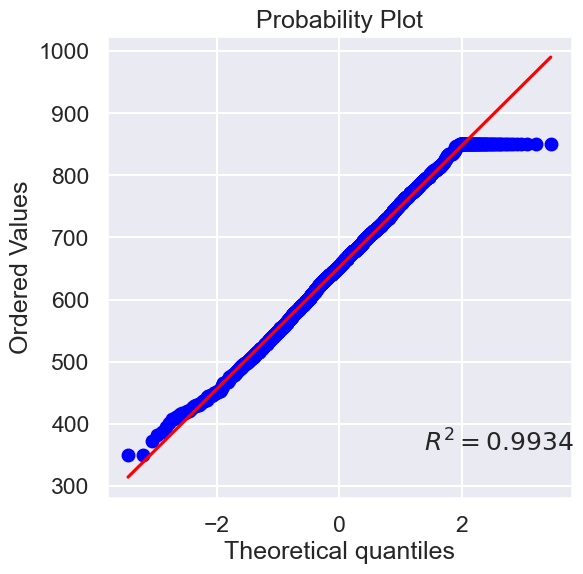

In [106]:
plt.figure(figsize=(6,6))
stats.probplot(gold, plot=plt, rvalue=True)

plt.show()

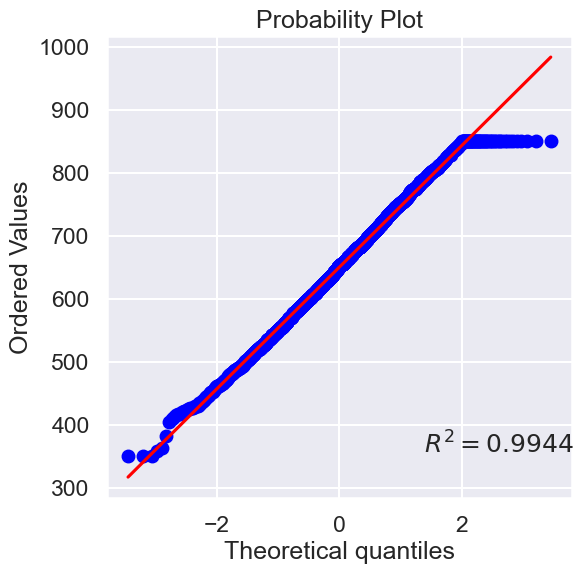

In [107]:
plt.figure(figsize=(6,6))
stats.probplot(silver, plot=plt, rvalue=True)

plt.show()

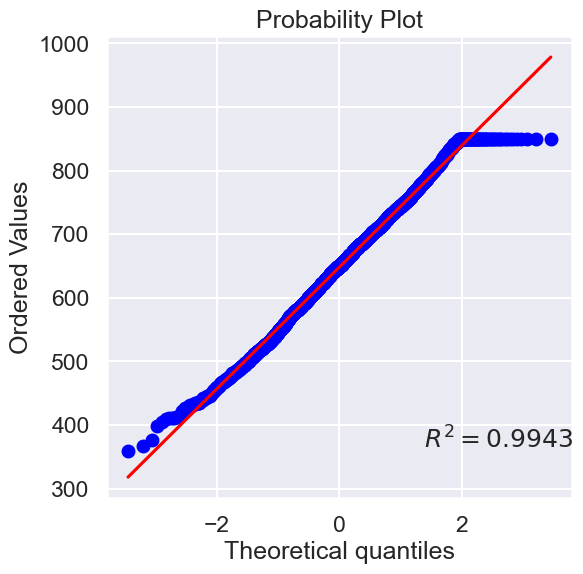

In [108]:
plt.figure(figsize=(6,6))
stats.probplot(platium, plot=plt, rvalue=True)

plt.show()

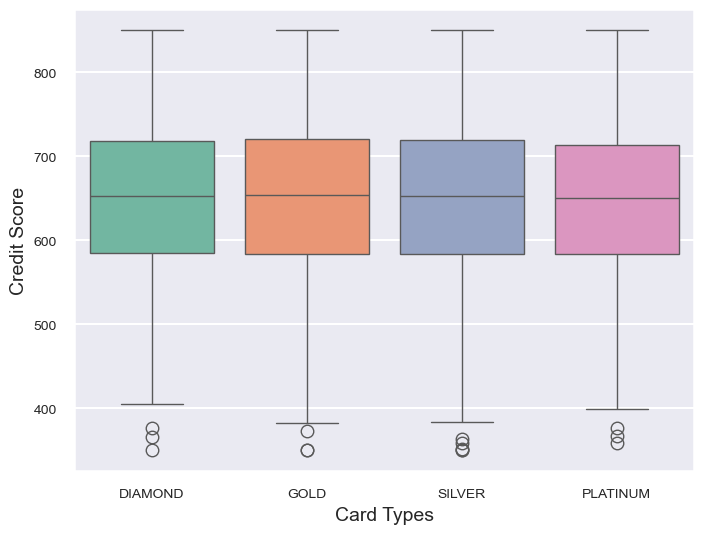

In [109]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.set_context('talk')

sns.boxplot(data=df, x="CardType", hue="CardType", y="CreditScore", palette="Set2")

plt.xlabel('Card Types', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

- __Normality Tests (p-value < 0.05):__ All groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
- __Visual Evidence from Q-Q Plot:__ The Q-Q plot shows an excellent fit with R^2 close to 1, and there are not many outliers observed in the boxplot, suggesting the data closely follows a normal distribution.
- __Large Sample Size (CLT):__ With a large sample size, the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

#### c)  Homogeneity of Variances

In [110]:
stats.levene(diamond,gold,silver,platium)

LeveneResult(statistic=0.6212572449672729, pvalue=0.6011740411463264)

The Levene's test returned a __p-value of 0.6011__, which is larger than 0.05. Therefore, we fail to reject the assumption of equal variances, indicating that the variances among the groups are not significantly different. Based on this, it is appropriate to proceed with a One-Way ANOVA test.

#### d)  One-Way ANOVA test

In [111]:
stats.f_oneway(diamond,gold,silver,platium) 

F_onewayResult(statistic=0.7810294924693836, pvalue=0.5043463759245638)

In [112]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [113]:
model = ols('CreditScore ~ CardType', data=df).fit()

In [114]:
pair = model.t_test_pairwise('CardType')
pair.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
GOLD-DIAMOND,1.269530,2.731402,0.464791,0.642091,-4.084568,6.623628,0.890957,False
PLATINUM-DIAMOND,-2.817685,2.733319,-1.030866,0.302629,-8.175541,2.540171,0.835062,False
SILVER-DIAMOND,-0.636297,2.733045,-0.232816,0.815909,-5.993615,4.721021,0.890957,False
PLATINUM-GOLD,-4.087215,2.734681,-1.494586,0.135054,-9.447741,1.273310,0.581271,False
SILVER-GOLD,-1.905827,2.734407,-0.696980,0.485831,-7.265815,3.454161,0.890957,False
SILVER-PLATINUM,2.181388,2.736322,0.797197,0.425355,-3.182354,7.545130,0.890957,False


### Conclusion: The One-Way ANOVA test shows a p-value of 0.5043, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means that there is no statistically significant difference between the means of the diamond, gold, silver, and platinum groups.

# 9. Check for presence of collinearity and multi-collinearity and address it appropriately.

### *-----------------------------------Categorical Target Variable : "Exited" - (X1, y1)--------------------------------------------*

### 1) Collinearity

In [118]:
X1 = df.drop('Exited',axis=1)
y1 = df['Exited']

In [119]:
X1

,Geography,Gender,Age,EstimatedSalary,Balance,CardType,Tenure,CreditScore,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore
0,France,Female,42,101348.88,0.00,DIAMOND,2,619,1,464,1,1,2
1,Spain,Female,41,112542.58,83807.86,DIAMOND,1,608,0,456,1,1,3
2,France,Female,42,113931.57,159660.80,DIAMOND,8,502,1,377,3,0,3
3,France,Female,39,93826.63,0.00,GOLD,1,699,0,350,2,0,5
4,Spain,Female,43,79084.10,125510.82,GOLD,2,850,1,425,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,96270.64,0.00,DIAMOND,5,771,1,300,2,0,1
9996,France,Male,35,101699.77,57369.61,PLATINUM,10,516,1,771,1,1,5
9997,France,Female,36,42085.58,0.00,SILVER,7,709,0,564,1,1,3
9998,Germany,Male,42,92888.52,75075.31,GOLD,3,772,1,339,2,0,2


In [120]:
y1

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [121]:
X1_corr = X1.corr(numeric_only=True)
X1_corr

,Age,EstimatedSalary,Balance,Tenure,CreditScore,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore
Age,1.000000,-0.007201,0.028308,-0.009997,-0.003965,-0.011721,0.002222,-0.030680,0.085472,-0.000876
EstimatedSalary,-0.007201,1.000000,0.012797,0.007784,-0.001384,-0.009933,-0.001515,0.014204,-0.011421,-0.013747
Balance,0.028308,0.012797,1.000000,-0.012254,0.006268,-0.014858,0.014608,-0.304180,-0.010084,-0.002588
Tenure,-0.009997,0.007784,-0.012254,1.000000,0.000842,0.022583,-0.010196,0.013444,-0.028362,0.008663
CreditScore,-0.003965,-0.001384,0.006268,0.000842,1.000000,-0.005458,0.000077,0.012238,0.025651,-0.012599
HasCrCard,-0.011721,-0.009933,-0.014858,0.022583,-0.005458,1.000000,-0.011041,0.003183,-0.011866,-0.000212
PointEarned,0.002222,-0.001515,0.014608,-0.010196,0.000077,-0.011041,1.000000,-0.015330,-0.004983,-0.014400
NumOfProducts,-0.030680,0.014204,-0.304180,0.013444,0.012238,0.003183,-0.015330,1.000000,0.009612,-0.011394
IsActiveMember,0.085472,-0.011421,-0.010084,-0.028362,0.025651,-0.011866,-0.004983,0.009612,1.000000,0.010236
SatisfactionScore,-0.000876,-0.013747,-0.002588,0.008663,-0.012599,-0.000212,-0.014400,-0.011394,0.010236,1.000000


In [122]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography          10000 non-null  object 
 1   Gender             10000 non-null  object 
 2   Age                10000 non-null  int64  
 3   EstimatedSalary    10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   CardType           10000 non-null  object 
 6   Tenure             10000 non-null  int64  
 7   CreditScore        10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   PointEarned        10000 non-null  int64  
 10  NumOfProducts      10000 non-null  int64  
 11  IsActiveMember     10000 non-null  int64  
 12  SatisfactionScore  10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


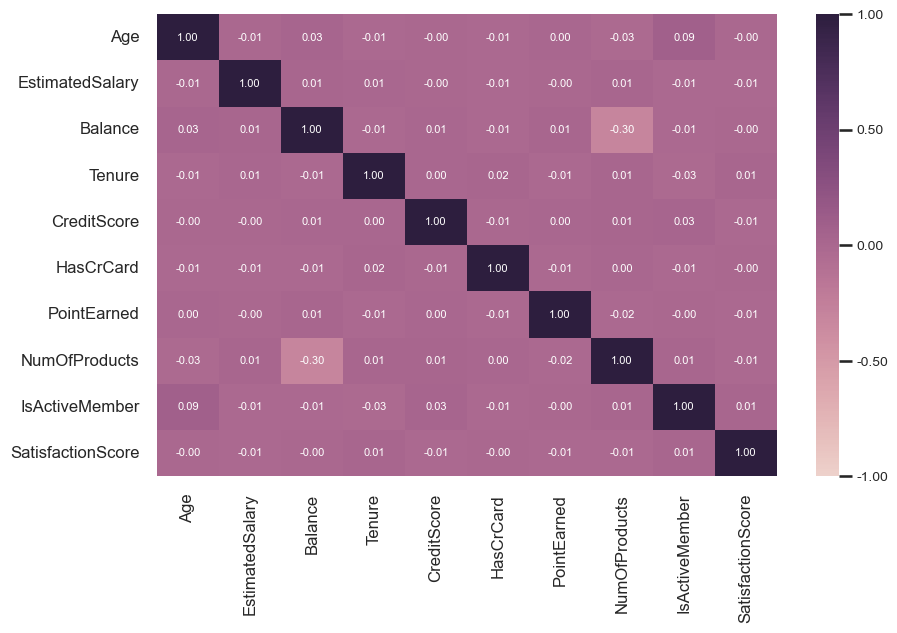

In [123]:
plt.figure(figsize=(10,6))

sns.heatmap(X1_corr, vmin=-1, fmt='.2f', annot=True, annot_kws={"size": 8}, cmap=sns.cubehelix_palette(as_cmap=True),cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1], 'format': '%.2f'})
cbar = plt.gcf().axes[-1] 
cbar.tick_params(labelsize=10) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### The correlation matrix shows that there is no high collinearity between the predictor variables, as none of the correlations are close to 1 or -1. This suggests that collinearity is not a significant issue in this dataset.

### 2) Multi-Collinearity 

In [124]:
def calculate_vif(df):
    vif = pd.DataFrame()
    numeric_features = X1.select_dtypes(exclude='object')
    vif['Feature'] = numeric_features.columns
    vif['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    return vif

X1_vif = calculate_vif(X1)
X1_vif

,Feature,VIF
0,Age,12.646869
1,EstimatedSalary,3.900937
2,Balance,2.645507
3,Tenure,3.884442
4,CreditScore,23.923070
5,HasCrCard,3.298456
6,PointEarned,7.537213
7,NumOfProducts,7.812911
8,IsActiveMember,2.073668
9,SatisfactionScore,5.277849


### "Age" and "CreditScore" indicate high multi-collinearity.

In [125]:
while True:
    X1_vif = calculate_vif(X1)
    X1_max_vif = X1_vif['VIF'].max()
    if X1_max_vif <= 10:
        break
    feature_drop = X1_vif.loc[X1_vif['VIF'].idxmax(),'Feature']
    print(f'Dropping {feature_drop} with VIF {X1_max_vif:.2f}')
    X1.drop(columns=[feature_drop], inplace=True)

Dropping CreditScore with VIF 23.92
Dropping Age with VIF 10.62


In [104]:
X1_vif = calculate_vif(X1)
X1_vif

,Feature,VIF
0,EstimatedSalary,3.687153
1,Balance,2.395452
2,Tenure,3.670691
3,HasCrCard,3.147467
4,PointEarned,6.363716
5,NumOfProducts,6.192946
6,IsActiveMember,1.992273
7,SatisfactionScore,4.790446


# 10. Encode the data if required (if there are categorical independent variables).

In [126]:
X1 = pd.get_dummies(X1, columns=['Geography','Gender','CardType'], drop_first=True)
X1

,EstimatedSalary,Balance,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
0,101348.88,0.00,2,1,464,1,1,2,False,False,False,False,False,False
1,112542.58,83807.86,1,0,456,1,1,3,False,True,False,False,False,False
2,113931.57,159660.80,8,1,377,3,0,3,False,False,False,False,False,False
3,93826.63,0.00,1,0,350,2,0,5,False,False,False,True,False,False
4,79084.10,125510.82,2,1,425,1,1,5,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,96270.64,0.00,5,1,300,2,0,1,False,False,True,False,False,False
9996,101699.77,57369.61,10,1,771,1,1,5,False,False,True,False,True,False
9997,42085.58,0.00,7,0,564,1,1,3,False,False,False,False,False,True
9998,92888.52,75075.31,3,1,339,2,0,2,True,False,True,True,False,False


# 11. Split the dataset into training and testing subsets.

In [127]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, stratify=y1, shuffle=True, random_state=1, test_size=0.2)

In [128]:
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((8000, 14), (8000,), (2000, 14), (2000,))

# 12. Scale the training data and use the same scaler to also scale the test data.

In [129]:
scaler = StandardScaler()

In [130]:
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [131]:
X1_train_scaled = pd.DataFrame(X1_train_scaled, index=X1_train.index, columns=X1_train.columns)
X1_train_scaled

,EstimatedSalary,Balance,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
3258,-1.507319,0.718496,0.696799,0.649008,-1.664750,-0.911181,0.966075,-0.013967,1.729169,-0.576196,-1.095546,-0.578697,-0.575426,-0.576580
6705,-1.243340,1.294818,0.006728,0.649008,-1.064411,0.800761,0.966075,-0.725672,-0.578313,-0.576196,0.912787,1.728019,-0.575426,-0.576580
696,-0.405978,-0.196050,-1.373414,0.649008,-0.206148,-0.911181,0.966075,1.409443,-0.578313,1.735522,0.912787,-0.578697,1.737844,-0.576580
3768,1.711239,0.402302,-1.028378,-1.540813,-0.713101,-0.911181,-1.035116,-0.013967,-0.578313,1.735522,0.912787,-0.578697,1.737844,-0.576580
7981,1.000205,0.203930,1.386870,-1.540813,-0.032717,-0.911181,-1.035116,-0.013967,1.729169,-0.576196,0.912787,-0.578697,-0.575426,1.734363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,-1.255006,-1.222228,-1.718449,0.649008,1.305817,0.800761,-1.035116,-0.725672,-0.578313,-0.576196,0.912787,-0.578697,-0.575426,1.734363
4991,-0.700743,0.230818,1.041835,0.649008,1.145727,-0.911181,0.966075,-0.013967,-0.578313,-0.576196,-1.095546,-0.578697,-0.575426,-0.576580
96,-0.614707,0.423440,1.386870,-1.540813,-0.530776,-0.911181,0.966075,1.409443,-0.578313,1.735522,0.912787,-0.578697,-0.575426,-0.576580
451,0.337688,-1.222228,1.386870,-1.540813,-1.629175,0.800761,0.966075,-0.725672,-0.578313,-0.576196,0.912787,1.728019,-0.575426,-0.576580


In [132]:
X1_test_scaled = pd.DataFrame(X1_test_scaled, index=X1_test.index, columns=X1_test.columns)
X1_test_scaled

,EstimatedSalary,Balance,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
3336,-0.766226,-1.222228,1.731905,0.649008,1.194643,0.800761,-1.035116,-0.725672,-0.578313,1.735522,0.912787,1.728019,-0.575426,-0.576580
2596,-1.648671,0.965134,-0.338307,-1.540813,-0.468519,0.800761,-1.035116,1.409443,-0.578313,-0.576196,-1.095546,1.728019,-0.575426,-0.576580
7131,-0.251679,0.715293,1.041835,-1.540813,0.216313,-0.911181,-1.035116,-1.437377,-0.578313,-0.576196,0.912787,-0.578697,1.737844,-0.576580
4179,-0.121030,-1.222228,-1.028378,0.649008,-0.339557,0.800761,0.966075,-1.437377,-0.578313,1.735522,0.912787,-0.578697,1.737844,-0.576580
8577,0.377733,0.957323,-1.373414,0.649008,-0.864298,-0.911181,0.966075,0.697738,1.729169,-0.576196,0.912787,-0.578697,-0.575426,1.734363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,0.762426,-1.222228,1.041835,0.649008,1.167962,0.800761,-1.035116,0.697738,-0.578313,-0.576196,0.912787,-0.578697,-0.575426,-0.576580
1464,1.425023,-1.222228,0.351764,0.649008,-1.678091,0.800761,0.966075,-0.013967,-0.578313,1.735522,-1.095546,-0.578697,1.737844,-0.576580
1276,-0.074049,0.594064,0.006728,0.649008,1.608210,-0.911181,-1.035116,-1.437377,1.729169,-0.576196,0.912787,-0.578697,1.737844,-0.576580
6874,-1.700503,-1.222228,-0.683343,0.649008,0.109586,0.800761,-1.035116,-0.725672,-0.578313,-0.576196,0.912787,1.728019,-0.575426,-0.576580


# 13. Select one categorical variable as the target. Conduct logistic regression and decision tree analysis to predict it and compare the performance of the two models. 
- #### *Check for overfitting and take steps to address it*


## __1. Logistic Regression__

In [133]:
lr = LogisticRegression()

In [134]:
lr.fit(X1_train_scaled, y1_train)

LogisticRegression()

In [135]:
y1_test_pred = lr.predict(X1_test_scaled)

In [136]:
y1_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
lr.intercept_

array([-1.48543635])

In [138]:
lr.coef_

array([[ 0.02479927,  0.11830348, -0.04826634, -0.02423204, -0.01438343,
        -0.07806274, -0.40203846, -0.01885879,  0.36524057,  0.03907988,
        -0.2625724 , -0.03750977, -0.02788996, -0.00913211]])

In [139]:
lr_coef = pd.DataFrame(lr.coef_, columns=X1_test_scaled.columns)
lr_coef

,EstimatedSalary,Balance,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
0,0.024799,0.118303,-0.048266,-0.024232,-0.014383,-0.078063,-0.402038,-0.018859,0.365241,0.03908,-0.262572,-0.03751,-0.02789,-0.009132


### Observations:
#### The logistic regression coefficients indicate the relationship between the independent variables and the likelihood of a customer exiting (churn):

- ##### __Positive Coefficients:__
    - Geography_Germany (0.365): Being from Germany significantly increases the likelihood of churn.
    - Balance (0.118): A slight positive impact on churn, meaning higher balances may lead to a slightly higher churn probability.

- ##### __Negative Coefficients:__
    - IsActiveMember (-0.402): Being an active member significantly decreases the likelihood of churn.
    - Gender_Male (-0.262): Males are less likely to churn compared to females.
    - PointEarned (-0.014): Earning more points reduces the churn likelihood, though the effect is minor.
#### In summary, customers in Germany and those with higher balances are more likely to churn, while active members and males are less likely to leave the service.

## __*Model Evaluation*__

In [140]:
df_y1_test_pred = pd.DataFrame({'Actual_Values':y1_test, 'Predicted_Values':y1_test_pred})
df_y1_test_pred

,Actual_Values,Predicted_Values
3336,0,0
2596,0,0
7131,0,0
4179,0,0
8577,1,0
...,...,...
1504,0,0
1464,0,0
1276,1,0
6874,0,0


In [141]:
y1_train_pred = lr.predict(X1_train_scaled)
y1_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### __*Training Dataset*__

In [142]:
train_accuracy = accuracy_score(y1_train, y1_train_pred)
print(f'Accuracy_Score of Training Dataset: {train_accuracy:.4f}')

train_confusion_matrix = confusion_matrix(y1_train, y1_train_pred)
print("Confusion Matrix of Training Dataset:")
print(train_confusion_matrix)

train_class_report = classification_report(y1_train, y1_train_pred)
print("Classification Report of Training Dataset:")
print(train_class_report)

Accuracy_Score of Training Dataset: 0.7971
Confusion Matrix of Training Dataset:
[[6312   58]
 [1565   65]]
Classification Report of Training Dataset:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6370
           1       0.53      0.04      0.07      1630

    accuracy                           0.80      8000
   macro avg       0.66      0.52      0.48      8000
weighted avg       0.75      0.80      0.72      8000



#### __*Test Dataset*__

In [143]:
test_accuracy = accuracy_score(y1_test, y1_test_pred)
print(f'Accuracy_Score of Test Dataset: {test_accuracy:.4f}')

test_confusion_matrix = confusion_matrix(y1_test, y1_test_pred)
print("Confusion Matrix of Test Dataset:")
print(test_confusion_matrix)

test_class_report = classification_report(y1_test, y1_test_pred)
print("Classification Report of Test Dataset:")
print(test_class_report)

Accuracy_Score of Test Dataset: 0.7940
Confusion Matrix of Test Dataset:
[[1572   20]
 [ 392   16]]
Classification Report of Test Dataset:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1592
           1       0.44      0.04      0.07       408

    accuracy                           0.79      2000
   macro avg       0.62      0.51      0.48      2000
weighted avg       0.73      0.79      0.72      2000



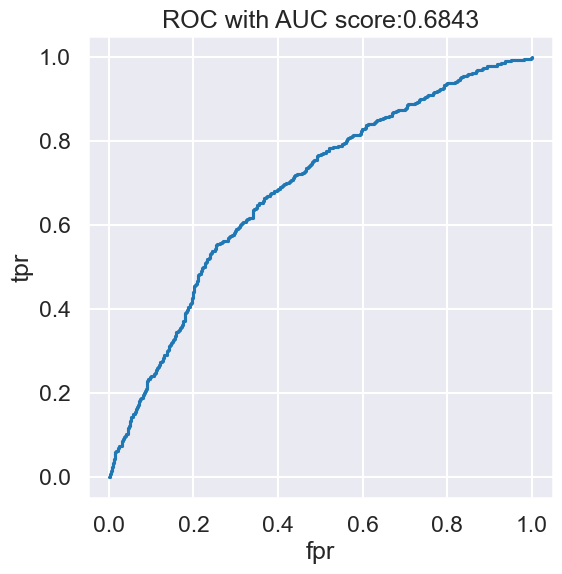

In [144]:
y1_test_pred_prob = lr.predict_proba(X1_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y1_test, y1_test_pred_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'ROC with AUC score:{round(roc_auc_score(y1_test, y1_test_pred_prob),4)}')

plt.show()

### Observations:
#### The model shows comparable accuracy on both the training dataset (79.71%) and the test dataset (79.40%), indicating that there is no severe overfitting. However, the model struggles with classifying the minority class (label 1 - churned customers) as indicated by the low precision and recall for this class (precision = 0.53 on training, 0.44 on testing; recall = 0.04 and 0.04 respectively). This suggests that while the model performs reasonably well overall, it may not be adequately capturing the patterns for the churn class, which could be addressed by using techniques to handle class imbalance.

## __*Corss Validation*__

In [145]:
crscore = cross_val_score(lr, X1_train_scaled, y1_train, cv=5)
crscore

array([0.79    , 0.796875, 0.799375, 0.798125, 0.798125])

In [146]:
crscore.mean()

0.7965

#### The model is performing consistently and well across the different cross-validation folds, with accuracy mean score at 79.65%.

## __*Hyperparameter Tuning*__

#### *Tuning 1*

In [176]:
lr1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced')

In [177]:
lr1.fit(X1_train_scaled,y1_train)
y1_test_pred = lr1.predict(X1_test_scaled)

In [178]:
test_accuracy = accuracy_score(y1_test, y1_test_pred)
print(f'Accuracy_Score of Test Dataset: {test_accuracy:.4f}')
print(confusion_matrix(y1_test, y1_test_pred))
print(classification_report(y1_test, y1_test_pred))

Accuracy_Score of Test Dataset: 0.6480
[[1037  555]
 [ 149  259]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1592
           1       0.32      0.63      0.42       408

    accuracy                           0.65      2000
   macro avg       0.60      0.64      0.59      2000
weighted avg       0.76      0.65      0.68      2000



In [180]:
# Train dataset:
y1_train_pred = lr1.predict(X1_train_scaled)

train_accuracy = accuracy_score(y1_train, y1_train_pred)
print(f'Accuracy_Score of Training Dataset: {train_accuracy:.4f}')

train_confusion_matrix = confusion_matrix(y1_train, y1_train_pred)
print(train_confusion_matrix)

train_class_report = classification_report(y1_train, y1_train_pred)
print("Classification Report of Training Dataset:")
print(train_class_report)

Accuracy_Score of Training Dataset: 0.6464
[[4169 2201]
 [ 628 1002]]
Classification Report of Training Dataset:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      6370
           1       0.31      0.61      0.41      1630

    accuracy                           0.65      8000
   macro avg       0.59      0.63      0.58      8000
weighted avg       0.76      0.65      0.68      8000



#### *Tuning 2*

In [151]:
C_values = [0.1, 0.3]
l1_ratios = [0.3, 0.5, 0.7]

for C_val in C_values:
    for l1_ratio in l1_ratios:
        print(f'Training Model: C={C_val} & l1_ratio={l1_ratio}')

        LR = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, C=C_val, l1_ratio=l1_ratio, class_weight='balanced')
        LR.fit(X1_train_scaled, y1_train)
        y1_test_pred = LR.predict(X1_test_scaled)
    
        print(confusion_matrix(y1_test,y1_test_pred))
        print(classification_report(y1_test,y1_test_pred))
        print("*"*80)

Training Model: C=0.1 & l1_ratio=0.3
[[1035  557]
 [ 149  259]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1592
           1       0.32      0.63      0.42       408

    accuracy                           0.65      2000
   macro avg       0.60      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000

********************************************************************************
Training Model: C=0.1 & l1_ratio=0.5
[[1035  557]
 [ 149  259]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1592
           1       0.32      0.63      0.42       408

    accuracy                           0.65      2000
   macro avg       0.60      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000

********************************************************************************
Training Model: C=0.1 & l1_ratio=0.7
[[1034  558]
 [ 149

### Summary:

- #### After trying different hyperparameters, the overall accuracy score dropped from 79% to 65%.
- #### The prediction for class 1 (churn) improved in terms of recall, which increased to 63% from prior attempts, but precision remains low at 32%.
- #### Additional hyperparameter tuning did not lead to further improvement in performance, indicating that the model is now prioritizing recall for class 1 at the expense of overall accuracy. This suggests a trade-off between correctly identifying churners and maintaining general accuracy for both classes.

## __2. Decision Tree Classifier__

### __*Gini Impurity*__

In [33]:
crosstabs = {}
df_indep = df.drop('Exited',axis=1)

for feature in df_indep.columns:
    crosstab = pd.crosstab(df[feature],df['Exited'], margins=True)
    crosstabs[feature] = crosstab
    
    print(f'"{feature}" and "Exited"')
    print(crosstab)
    print("*"*60)

"Geography" and "Exited"
Exited        0     1    All
Geography                   
France     4203   811   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7962  2038  10000
************************************************************
"Gender" and "Exited"
Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4558   899   5457
All     7962  2038  10000
************************************************************
"Age" and "Exited"
Exited     0     1    All
Age                      
18        20     2     22
19        26     1     27
20        38     2     40
21        50     3     53
22        72    12     84
..       ...   ...    ...
84         1     1      2
85         1     0      1
88         1     0      1
92         2     0      2
All     7962  2038  10000

[71 rows x 3 columns]
************************************************************
"EstimatedSalary" and "Exited"
Exited              0     1    All
EstimatedSalary     

In [30]:
# Calculate Gini impurity for each independent variable

def gini_impurity(value_counts):
    n = value_counts.sum()
    p_sum = 0

    for val in value_counts.keys():
        p_sum = p_sum + (value_counts[val]/n)**2
    gini = 1- p_sum
    return gini


def gini_split(feature_name):
    attribute_values = df[feature_name].value_counts()
    weighted_gini = 0

    for key in attribute_values.keys():
        df_k = df['Exited'][df[feature_name] == key].value_counts()
        gini_k = gini_impurity(df_k)
        k_weight = attribute_values[key]/len(df)
        weighted_gini += k_weight*gini_k
    return  weighted_gini

gini_impurities = {}
for key in df.columns:
    if key != 'Exited':
        gini_impurities[key] = gini_split(key)
        print(f'Gini for {key} is {gini_impurities[key]:.4f}')

Gini for Geography is 0.3148
Gini for Gender is 0.3209
Gini for Age is 0.2724
Gini for EstimatedSalary is 0.0000
Gini for Balance is 0.0863
Gini for CardType is 0.3244
Gini for Tenure is 0.3241
Gini for CreditScore is 0.3080
Gini for HasCrCard is 0.3245
Gini for PointEarned is 0.2987
Gini for NumOfProducts is 0.2758
Gini for IsActiveMember is 0.3166
Gini for SatisfactionScore is 0.3244


### Overall, "EstimatedSalary" is the most informative features with lower Gini impurity, which could contribute more to model performance.

In [154]:
dtc = DecisionTreeClassifier()
dtc.fit(X1_train_scaled, y1_train)

DecisionTreeClassifier()

In [155]:
y1_test_pred = dtc.predict(X1_test_scaled)

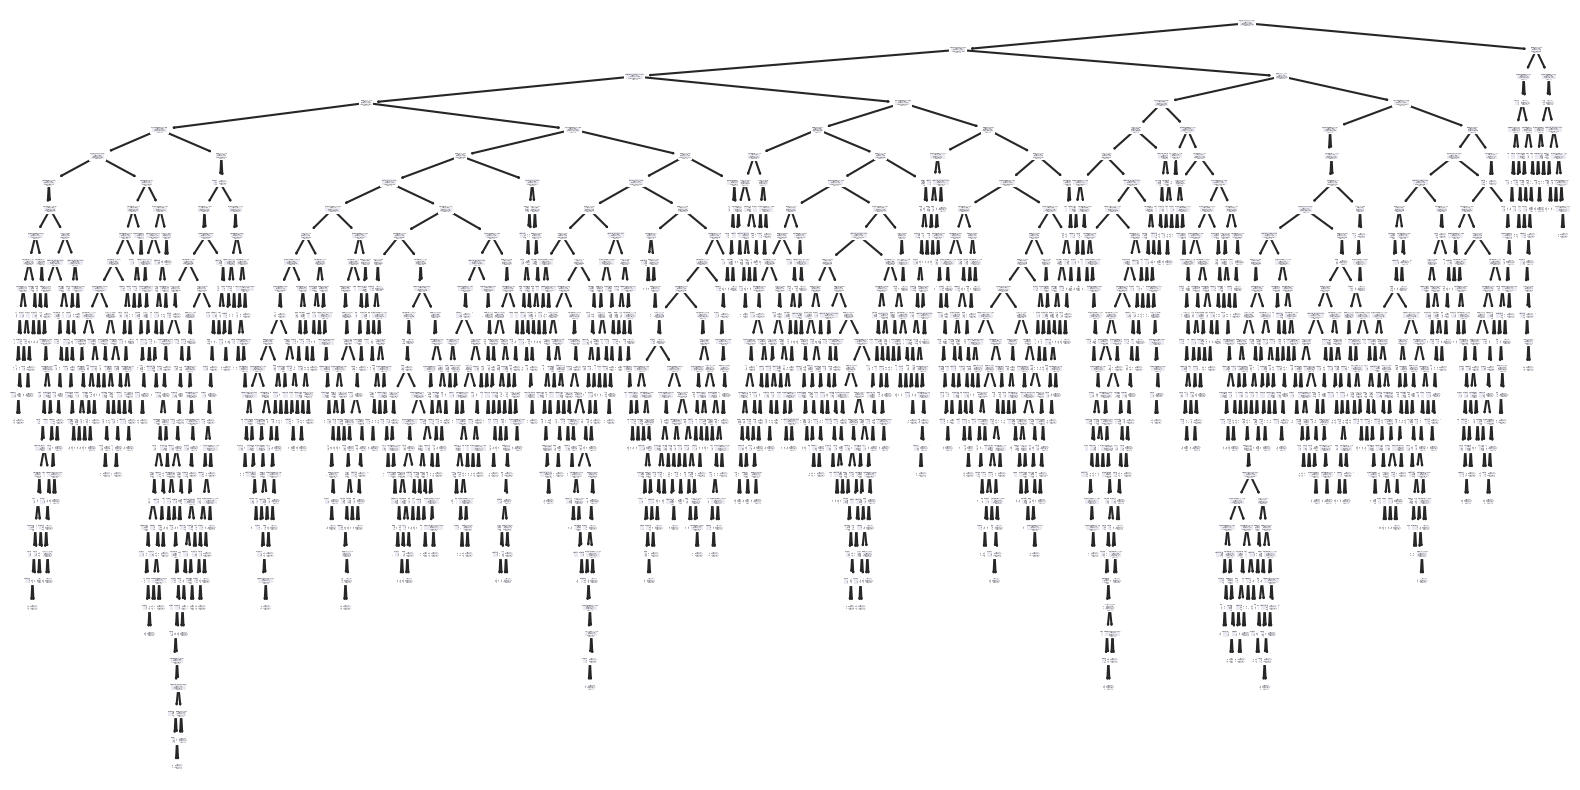

In [156]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X1_train_scaled.columns, class_names=y1_train.unique().astype(str))

plt.show()

## __*Model Evaluation*__

In [157]:
print("Training Dataset:", accuracy_score(y1_train, dtc.predict(X1_train_scaled)))
print("Test Dataset:", accuracy_score(y1_test, y1_test_pred))
print(classification_report(y1_test, y1_test_pred))

Training Dataset: 1.0
Test Dataset: 0.7515
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1592
           1       0.40      0.42      0.41       408

    accuracy                           0.75      2000
   macro avg       0.62      0.63      0.63      2000
weighted avg       0.76      0.75      0.75      2000



#### The training dataset achieves a perfect accuracy score of 100%, while the test dataset has an accuracy of 75.70%. The prediction on "Exited"(class 1) is very low. This significant difference suggests that the model is overfitting to the training data. 
#### This indicates the model have learned noise and specific patterns in the training data rather than general trends, resulting in poor generalization.

In [158]:
train_scores = []
test_scores = []

for i in range(1,21,1):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X1_train_scaled, y1_train)
    y1_test_pred = model.predict(X1_test_scaled)

    train_score = accuracy_score(y1_train, model.predict(X1_train_scaled))
    train_scores.append(train_score)

    test_score = accuracy_score(y1_test, y1_test_pred)
    test_scores.append(test_score)

In [159]:
train_scores

[0.820625,
 0.820625,
 0.82075,
 0.825875,
 0.831125,
 0.8405,
 0.8445,
 0.852375,
 0.861625,
 0.87325,
 0.884375,
 0.901,
 0.9185,
 0.931875,
 0.948875,
 0.961875,
 0.9725,
 0.979,
 0.985625,
 0.990375]

In [160]:
test_scores

[0.8155,
 0.8155,
 0.8155,
 0.8095,
 0.8155,
 0.822,
 0.816,
 0.8085,
 0.8025,
 0.7985,
 0.799,
 0.79,
 0.7855,
 0.7775,
 0.7815,
 0.772,
 0.77,
 0.764,
 0.7595,
 0.767]

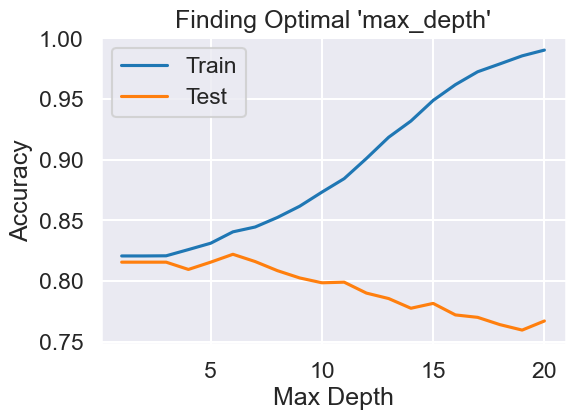

In [165]:
plt.figure(figsize=(6,4))
plt.plot(range(1,21,1), train_scores, label='Train')
plt.plot(range(1,21,1), test_scores, label='Test')

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Finding Optimal 'max_depth'")
plt.legend()
plt.show()

In [166]:
kfold_scores = []

for i in range(1,21,1):
    model = DecisionTreeClassifier(max_depth=i)
    kfold_score = cross_val_score(model, X1_train_scaled, y1_train, cv=5).mean()
    kfold_scores.append(kfold_score)

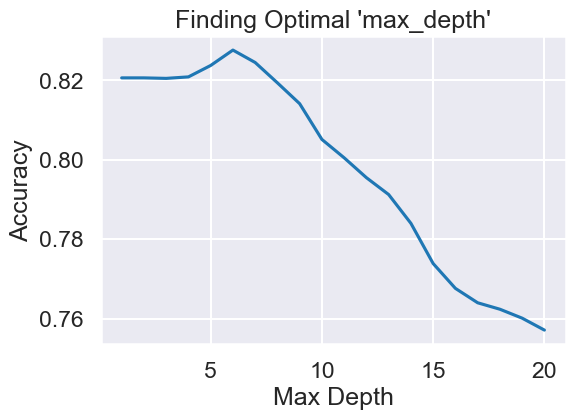

In [167]:
plt.figure(figsize=(6,4))
plt.plot(range(1,21,1), kfold_scores)

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Finding Optimal 'max_depth'")
plt.show()

#### The two plots illustrate how the model's performance changes as the maximum depth of the decision tree increases.

- __*Training and Test Score Plot:*__ As the tree depth exceeds 6 or 7, the training accuracy continues to rise, but the test accuracy declines, indicating overfitting. Beyond a certain depth, the model fits the training data too well but fails to generalize effectively to unseen data.

- __*K-Fold Cross-Validation Plot:*__ The accuracy from cross-validation peaks around a depth of 5 to 7, then gradually drops as depth increases. This further confirms that after a certain depth, the model becomes overly complex, and its generalization ability declines.

#### Together, these plots suggest that the optimal depth for this decision tree lies between __6 and 7__, where the model balances complexity and generalization, achieving the best performance on unseen data.

## __*Pruning*__

In [168]:
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(X1_train_scaled, y1_train)

DecisionTreeClassifier(max_depth=6)

In [169]:
y1_test_pred = dtc.predict(X1_test_scaled)

In [170]:
print("Training Dataset:", accuracy_score(y1_train, dtc.predict(X1_train_scaled)))
print("Test Dataset:", accuracy_score(y1_test, y1_test_pred))
print(classification_report(y1_test, y1_test_pred))

Training Dataset: 0.8405
Test Dataset: 0.8225
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1592
           1       0.61      0.35      0.44       408

    accuracy                           0.82      2000
   macro avg       0.73      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000



### Summary:
- #### The test accuracy improved to 82.20%, indicating better generalization to unseen data.
- #### Previous Model (Max Depth=Undefined): The training accuracy is 100%, indicating significant overfitting where the model perfectly predicts the training data.
- #### Current Model (Max Depth=6): The training accuracy is 84.05%, which is more realistic and suggests that the model is not overfitting as heavily. The recall for churners dropped to 35%. While the overall model generalization improved, the recall for churners worsened, suggesting that the current model struggles to identify churners.

#### The current model (with max depth = 6) is better at generalizing to unseen data, as indicated by the improved test accuracy and reduced overfitting. However, this comes at the cost of slightly lower recall for churners. While the overall model performs better, additional efforts are needed to improve the recall for class 1 (churn) without sacrificing overall accuracy.

# Conclusions:

#### The Decision Tree model performs better overall with higher accuracy, but the Logistic Regression model is more effective at identifying churners. Depending on the business objective (e.g., prioritizing accuracy or focusing on identifying churners), either model could be considered.
- ##### Logistic Regression model has an accuracy of 65%, while the Decision Tree model (max_depth = 6) achieved a better accuracy of 82%.
- ##### Logistic Regression's recall for class 1 is 63%, which is higher compared to the Decision Tree model’s recall of 35%.
- ##### Decision Tree predicts "Not Churn" (94%) with much higher recall than the Logistic Regression model (65%).
#### The Decision Tree has a better overall balance between precision and recall for both classes.

# 14. Select one continuous variable as the target. Conduct Linear Regression and Regression Tree to predict it and compare the performance of the two models.- #### *Check for validity of assumptions (LINE)*
- #### *Check for overfitting and take steps to address it*


### *---------------------------------Numerical Target Variable : "Balance" - (X2, y2)-----------------------------------*

### 1) Collinearity

In [71]:
df = df_original.copy()

In [72]:
df.rename(columns={'Satisfaction Score': 'SatisfactionScore', 'Card Type': 'CardType', 'Point Earned':'PointEarned'}, inplace=True)

In [73]:
df = df[['Geography','Gender','Age','EstimatedSalary','Balance','CardType', 'Tenure',
        'CreditScore','HasCrCard','PointEarned','NumOfProducts','IsActiveMember','SatisfactionScore','Complain','Exited']]
df

,Geography,Gender,Age,EstimatedSalary,Balance,CardType,Tenure,CreditScore,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Exited
0,France,Female,42,101348.88,0.00,DIAMOND,2,619,1,464,1,1,2,1,1
1,Spain,Female,41,112542.58,83807.86,DIAMOND,1,608,0,456,1,1,3,1,0
2,France,Female,42,113931.57,159660.80,DIAMOND,8,502,1,377,3,0,3,1,1
3,France,Female,39,93826.63,0.00,GOLD,1,699,0,350,2,0,5,0,0
4,Spain,Female,43,79084.10,125510.82,GOLD,2,850,1,425,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,96270.64,0.00,DIAMOND,5,771,1,300,2,0,1,0,0
9996,France,Male,35,101699.77,57369.61,PLATINUM,10,516,1,771,1,1,5,0,0
9997,France,Female,36,42085.58,0.00,SILVER,7,709,0,564,1,1,3,1,1
9998,Germany,Male,42,92888.52,75075.31,GOLD,3,772,1,339,2,0,2,1,1


In [74]:
X2 = df.drop('Balance',axis=1)
y2 = df['Balance']

In [75]:
X2

,Geography,Gender,Age,EstimatedSalary,CardType,Tenure,CreditScore,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Exited
0,France,Female,42,101348.88,DIAMOND,2,619,1,464,1,1,2,1,1
1,Spain,Female,41,112542.58,DIAMOND,1,608,0,456,1,1,3,1,0
2,France,Female,42,113931.57,DIAMOND,8,502,1,377,3,0,3,1,1
3,France,Female,39,93826.63,GOLD,1,699,0,350,2,0,5,0,0
4,Spain,Female,43,79084.10,GOLD,2,850,1,425,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,96270.64,DIAMOND,5,771,1,300,2,0,1,0,0
9996,France,Male,35,101699.77,PLATINUM,10,516,1,771,1,1,5,0,0
9997,France,Female,36,42085.58,SILVER,7,709,0,564,1,1,3,1,1
9998,Germany,Male,42,92888.52,GOLD,3,772,1,339,2,0,2,1,1


In [76]:
y2

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [77]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography          10000 non-null  object 
 1   Gender             10000 non-null  object 
 2   Age                10000 non-null  int64  
 3   EstimatedSalary    10000 non-null  float64
 4   CardType           10000 non-null  object 
 5   Tenure             10000 non-null  int64  
 6   CreditScore        10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   PointEarned        10000 non-null  int64  
 9   NumOfProducts      10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  SatisfactionScore  10000 non-null  int64  
 12  Complain           10000 non-null  int64  
 13  Exited             10000 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.1+ MB


In [78]:
X2_corr = X2.corr(numeric_only=True)
X2_corr

,Age,EstimatedSalary,Tenure,CreditScore,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Exited
Age,1.000000,-0.007201,-0.009997,-0.003965,-0.011721,0.002222,-0.030680,0.085472,-0.000876,0.283530,0.285296
EstimatedSalary,-0.007201,1.000000,0.007784,-0.001384,-0.009933,-0.001515,0.014204,-0.011421,-0.013747,0.012494,0.012490
Tenure,-0.009997,0.007784,1.000000,0.000842,0.022583,-0.010196,0.013444,-0.028362,0.008663,-0.013047,-0.013656
CreditScore,-0.003965,-0.001384,0.000842,1.000000,-0.005458,0.000077,0.012238,0.025651,-0.012599,-0.027048,-0.026771
HasCrCard,-0.011721,-0.009933,0.022583,-0.005458,1.000000,-0.011041,0.003183,-0.011866,-0.000212,-0.007095,-0.006976
PointEarned,0.002222,-0.001515,-0.010196,0.000077,-0.011041,1.000000,-0.015330,-0.004983,-0.014400,-0.002893,-0.004628
NumOfProducts,-0.030680,0.014204,0.013444,0.012238,0.003183,-0.015330,1.000000,0.009612,-0.011394,-0.046357,-0.047611
IsActiveMember,0.085472,-0.011421,-0.028362,0.025651,-0.011866,-0.004983,0.009612,1.000000,0.010236,-0.154741,-0.156356
SatisfactionScore,-0.000876,-0.013747,0.008663,-0.012599,-0.000212,-0.014400,-0.011394,0.010236,1.000000,-0.004799,-0.005849
Complain,0.283530,0.012494,-0.013047,-0.027048,-0.007095,-0.002893,-0.046357,-0.154741,-0.004799,1.000000,0.995693


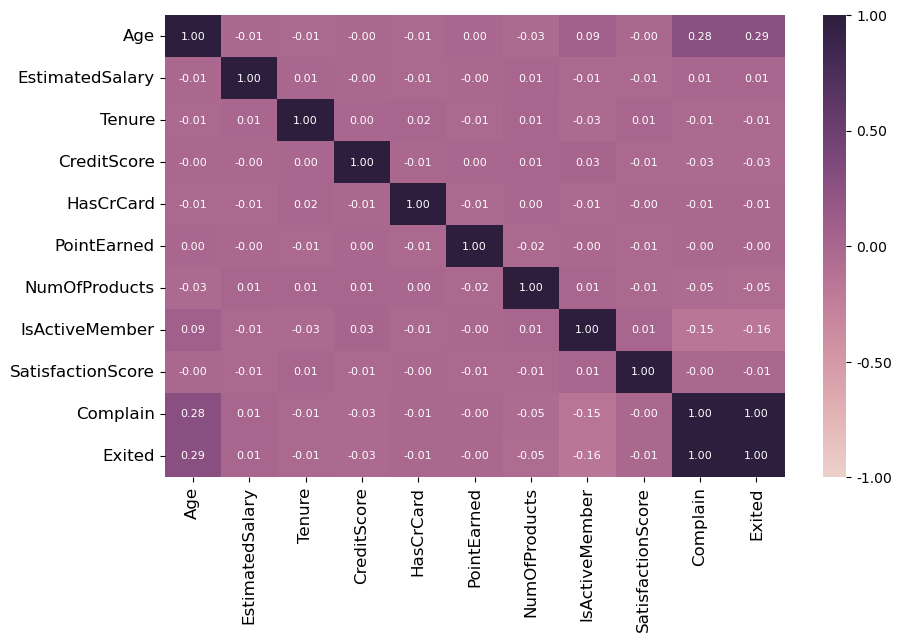

In [79]:
plt.figure(figsize=(10,6))

sns.heatmap(X2_corr, vmin=-1, fmt='.2f', annot=True, annot_kws={"size": 8}, cmap=sns.cubehelix_palette(as_cmap=True),cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1], 'format': '%.2f'})
cbar = plt.gcf().axes[-1] 
cbar.tick_params(labelsize=10) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [80]:
iters = range(len(X2_corr.columns))
drop_cols = []

for i in iters:
    for j in range(i):
        item = X2_corr.iloc[j:(j+1), i:(i+1)]
        col = item.columns
        row = item.index
        val = abs(item.values)

        if val >= 0.6:
            print(col.values[0], '|', row.values[0], '|', round(val[0][0],2))
            drop_cols.append(col.values[0])

drops = set(drop_cols)
X2 = X2.drop(columns=drops)

Exited | Complain | 1.0


In [81]:
X2.columns

Index(['Geography', 'Gender', 'Age', 'EstimatedSalary', 'CardType', 'Tenure',
       'CreditScore', 'HasCrCard', 'PointEarned', 'NumOfProducts',
       'IsActiveMember', 'SatisfactionScore', 'Complain'],
      dtype='object')

### 2) Multi-Collinearity 

In [82]:
def calculate_vif(df):
    vif = pd.DataFrame()
    numeric_features = X2.select_dtypes(exclude='object')
    vif['Feature'] = numeric_features.columns
    vif['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    return vif

X2_vif = calculate_vif(X2)
X2_vif

,Feature,VIF
0,Age,13.905867
1,EstimatedSalary,3.888651
2,Tenure,3.882498
3,CreditScore,22.839344
4,HasCrCard,3.297072
5,PointEarned,7.497384
6,NumOfProducts,7.315640
7,IsActiveMember,2.149608
8,SatisfactionScore,5.267046
9,Complain,1.419533


### "Age" and "CreditScore" indicate high multi-collinearity.

In [83]:
while True:
    X2_vif = calculate_vif(X2)
    X2_max_vif = X2_vif['VIF'].max()
    if X2_max_vif <= 10:
        break
    feature_drop = X2_vif.loc[X2_vif['VIF'].idxmax(),'Feature']
    print(f'Dropping {feature_drop} with VIF {X2_max_vif:.2f}')
    X2.drop(columns=[feature_drop], inplace=True)

Dropping CreditScore with VIF 22.84
Dropping Age with VIF 11.34


In [84]:
X2_vif = calculate_vif(X2)
X2_vif

,Feature,VIF
0,EstimatedSalary,3.630068
1,Tenure,3.630424
2,HasCrCard,3.123561
3,PointEarned,6.092270
4,NumOfProducts,6.081975
5,IsActiveMember,2.015656
6,SatisfactionScore,4.696332
7,Complain,1.261296


### 3) Encode Categorical Varibales

In [85]:
X2 = pd.get_dummies(X2, columns=['Geography','Gender','CardType'], drop_first=True)
X2

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
0,101348.88,2,1,464,1,1,2,1,False,False,False,False,False,False
1,112542.58,1,0,456,1,1,3,1,False,True,False,False,False,False
2,113931.57,8,1,377,3,0,3,1,False,False,False,False,False,False
3,93826.63,1,0,350,2,0,5,0,False,False,False,True,False,False
4,79084.10,2,1,425,1,1,5,0,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,96270.64,5,1,300,2,0,1,0,False,False,True,False,False,False
9996,101699.77,10,1,771,1,1,5,0,False,False,True,False,True,False
9997,42085.58,7,0,564,1,1,3,1,False,False,False,False,False,True
9998,92888.52,3,1,339,2,0,2,1,True,False,True,True,False,False


### 4) Split to Train and Test Datasets

In [29]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, shuffle=True, random_state=1, test_size=0.2)

In [30]:
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((8000, 14), (8000,), (2000, 14), (2000,))

In [31]:
X2_train.head()

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
2694,124749.08,3,0,354,2,1,2,0,True,False,True,False,True,False
5140,41104.82,4,0,838,2,0,1,0,False,False,False,False,True,False
2568,45750.21,6,1,705,1,1,4,1,True,False,False,False,True,False
3671,68367.18,6,0,234,2,1,1,0,True,False,False,False,False,False
7427,162515.17,8,0,504,1,0,5,0,False,True,True,False,False,False


### 5) Scale the Train and Test Datasets

In [32]:
scaler = StandardScaler()

In [33]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_train_scaled = pd.DataFrame(X2_train_scaled, index=X2_train.index, columns=X2_train.columns)
X2_train_scaled

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
2694,0.427394,-0.701742,-1.553374,-1.127709,0.802257,0.977259,-0.727810,-0.505268,1.714901,-0.572731,0.915091,-0.573694,1.717168,-0.577158
5140,-1.025487,-0.355203,-1.553374,1.012996,0.802257,-1.023271,-1.439604,-0.505268,-0.583124,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
2568,-0.944798,0.337876,0.643760,0.424745,-0.911510,0.977259,0.695779,1.979148,1.714901,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
3671,-0.551946,0.337876,-1.553374,-1.658462,0.802257,0.977259,-1.439604,-0.505268,1.714901,-0.572731,-1.092788,-0.573694,-0.582354,-0.577158
7427,1.083383,1.030954,-1.553374,-0.464267,-0.911510,-1.023271,1.407574,-0.505268,-0.583124,1.746019,0.915091,-0.573694,-0.582354,-0.577158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.579180,0.684415,0.643760,0.849347,-0.911510,0.977259,1.407574,-0.505268,1.714901,-0.572731,0.915091,-0.573694,-0.582354,-0.577158
7813,-0.529780,-0.701742,0.643760,1.154530,-0.911510,-1.023271,-0.727810,1.979148,1.714901,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
905,-0.140969,1.377494,0.643760,-0.937522,-0.911510,0.977259,-1.439604,1.979148,-0.583124,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
5192,0.017812,1.030954,0.643760,-0.725221,0.802257,0.977259,1.407574,-0.505268,-0.583124,-0.572731,-1.092788,-0.573694,-0.582354,1.732628


In [34]:
X2_test_scaled = scaler.transform(X2_test)
X2_test_scaled = pd.DataFrame(X2_test_scaled, index=X2_test.index,columns=X2_test.columns)
X2_test_scaled

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
9953,-0.053606,-1.048281,0.643760,0.818387,0.802257,0.977259,-0.016015,-0.505268,-0.583124,-0.572731,0.915091,1.743090,-0.582354,-0.577158
3850,-0.583927,-0.701742,0.643760,0.376092,-0.911510,-1.023271,-1.439604,-0.505268,-0.583124,-0.572731,0.915091,-0.573694,-0.582354,1.732628
4962,-0.166853,-1.048281,-1.553374,-0.234274,0.802257,0.977259,-0.727810,-0.505268,-0.583124,-0.572731,-1.092788,1.743090,-0.582354,-0.577158
3886,-1.712344,1.030954,-1.553374,1.357986,0.802257,0.977259,1.407574,-0.505268,1.714901,-0.572731,0.915091,1.743090,-0.582354,-0.577158
5437,1.329642,0.337876,0.643760,0.327440,-0.911510,0.977259,-0.016015,-0.505268,1.714901,-0.572731,0.915091,1.743090,-0.582354,-0.577158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,-1.401474,0.684415,0.643760,-1.317895,0.802257,-1.023271,-0.727810,-0.505268,-0.583124,1.746019,-1.092788,-0.573694,1.717168,-0.577158
162,-0.920916,0.684415,-1.553374,1.088186,-0.911510,-1.023271,-0.016015,-0.505268,-0.583124,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
7903,1.066997,1.724033,-1.553374,-0.964060,0.802257,0.977259,1.407574,-0.505268,-0.583124,1.746019,0.915091,-0.573694,-0.582354,-0.577158
2242,1.131013,-1.048281,0.643760,0.535318,0.802257,0.977259,-0.016015,-0.505268,1.714901,-0.572731,-1.092788,-0.573694,-0.582354,1.732628


### __Multi Linear Regression__

In [36]:
X2_train_scaled = sm.add_constant(X2_train_scaled)

model = sm.OLS(y2_train, X2_train_scaled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     200.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:24:06   Log-Likelihood:                -98476.
No. Observations:                8000   AIC:                         1.970e+05
Df Residuals:                    7985   BIC:                         1.971e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.646e+04    600.55

In [37]:
maxp = model.pvalues.max()
dropped_columns = []

while(maxp > 0.05):
    print(f"Adjusted R-squared: {model.rsquared_adj}")
    feature_to_drop = model.pvalues.idxmax()
    print(f"{model.pvalues.idxmax()}: p-value={maxp} dropped\n")

    dropped_columns.append(feature_to_drop)
    
    X2_train_scaled.drop(columns=[feature_to_drop], axis=1, inplace=True)
    model = sm.OLS(y2_train, X2_train_scaled).fit()
    maxp = model.pvalues.max()

print(model.summary())

Adjusted R-squared: 0.2583369452096267
SatisfactionScore: p-value=0.887712899281279 dropped

Adjusted R-squared: 0.2584279639299456
Tenure: p-value=0.8143312666926198 dropped

Adjusted R-squared: 0.25851569036335664
IsActiveMember: p-value=0.6045141866951065 dropped

Adjusted R-squared: 0.25858361375353256
Geography_Spain: p-value=0.6069667769435507 dropped

Adjusted R-squared: 0.25865185890704
CardType_PLATINUM: p-value=0.5733933407864 dropped

Adjusted R-squared: 0.25871522479650577
CardType_GOLD: p-value=0.5055531089482 dropped

Adjusted R-squared: 0.2587668670322839
CardType_SILVER: p-value=0.48811665467832166 dropped

Adjusted R-squared: 0.25881502866450634
EstimatedSalary: p-value=0.3863750603025172 dropped

Adjusted R-squared: 0.2588381737229438
PointEarned: p-value=0.35116901263418643 dropped

Adjusted R-squared: 0.25885028875816485
Gender_Male: p-value=0.13930940360545918 dropped

Adjusted R-squared: 0.25874034400535995
HasCrCard: p-value=0.12805110030414232 dropped

         

In [38]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

mlr = LinearRegression()
crscores = cross_val_score(mlr, X2_train_scaled, y2_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
crscores_r2 = cross_val_score(mlr, X2_train_scaled, y2_train, cv=cv, n_jobs=-1)

print("RMSE:", np.sqrt(np.mean(np.absolute(crscores))))
print("R^2:", crscores_r2.mean() )

RMSE: 53703.90262768056
R^2: 0.2585967474099884


### The model explains only 25.9% of the variance in "Balance", indicating the target variable having mild linear relationship with predictor variables.


## *Check Assumptions of MLR: LINE (X2_train, y2_train)*

### 1) Linearity (Actual vs Predictions)

In [42]:
X2_train_scaled.drop('const', axis=1, inplace=True)

In [46]:
X2_train_scaled

,NumOfProducts,Complain,Geography_Germany
2694,0.802257,-0.505268,1.714901
5140,0.802257,-0.505268,-0.583124
2568,-0.911510,1.979148,1.714901
3671,0.802257,-0.505268,1.714901
7427,-0.911510,-0.505268,-0.583124
...,...,...,...
2895,-0.911510,-0.505268,1.714901
7813,-0.911510,1.979148,1.714901
905,-0.911510,1.979148,-0.583124
5192,0.802257,-0.505268,-0.583124


In [47]:
dropped_columns

['SatisfactionScore',
 'Tenure',
 'IsActiveMember',
 'Geography_Spain',
 'CardType_PLATINUM',
 'CardType_GOLD',
 'CardType_SILVER',
 'EstimatedSalary',
 'PointEarned',
 'Gender_Male',
 'HasCrCard']

In [48]:
X2_test_scaled.drop(columns=dropped_columns, inplace=True)

In [49]:
X2_test_scaled

,NumOfProducts,Complain,Geography_Germany
9953,0.802257,-0.505268,-0.583124
3850,-0.911510,-0.505268,-0.583124
4962,0.802257,-0.505268,-0.583124
3886,0.802257,-0.505268,1.714901
5437,-0.911510,-0.505268,1.714901
...,...,...,...
3919,0.802257,-0.505268,-0.583124
162,-0.911510,-0.505268,-0.583124
7903,0.802257,-0.505268,-0.583124
2242,0.802257,-0.505268,1.714901


In [104]:
df_X2_line = pd.DataFrame()
df_X2_line['y2_train_actual'] = y2_train

mlr = LinearRegression()
mlr.fit(X2_train_scaled,y2_train)
df_X2_line['y2_train_pred'] = mlr.predict(X2_train_scaled)

df_X2_line['Errors'] = df_X2_line['y2_train_actual'] - df_X2_line['y2_train_pred']
df_X2_line

,y2_train_actual,y2_train_pred,Errors
2694,113146.98,104088.928307,9058.051693
5140,105767.28,45966.789528,59800.490472
2568,130024.87,139517.797277,-9492.927277
3671,111739.40,102200.672614,9538.727386
7427,122017.19,80980.400583,41036.789417
...,...,...,...
2895,107363.29,136258.375864,-28895.085864
7813,81245.79,139550.432462,-58304.642462
905,0.00,82881.230972,-82881.230972
5192,0.00,43418.975146,-43418.975146


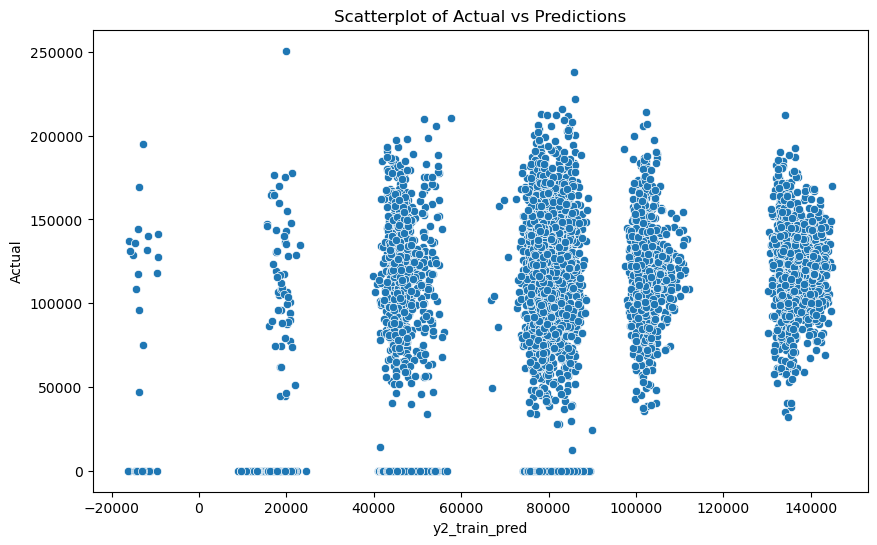

In [105]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df_X2_line, x="y2_train_pred", y="y2_train_actual")

plt.title("Scatterplot of Actual vs Predictions")
plt.xlabel("y2_train_pred")
plt.ylabel("Actual")
plt.show()

### No linear relationship.

### 2) Independence (Residuals vs Predictions)

In [106]:
df_X2_line

,y2_train_actual,y2_train_pred,Errors
2694,113146.98,104088.928307,9058.051693
5140,105767.28,45966.789528,59800.490472
2568,130024.87,139517.797277,-9492.927277
3671,111739.40,102200.672614,9538.727386
7427,122017.19,80980.400583,41036.789417
...,...,...,...
2895,107363.29,136258.375864,-28895.085864
7813,81245.79,139550.432462,-58304.642462
905,0.00,82881.230972,-82881.230972
5192,0.00,43418.975146,-43418.975146


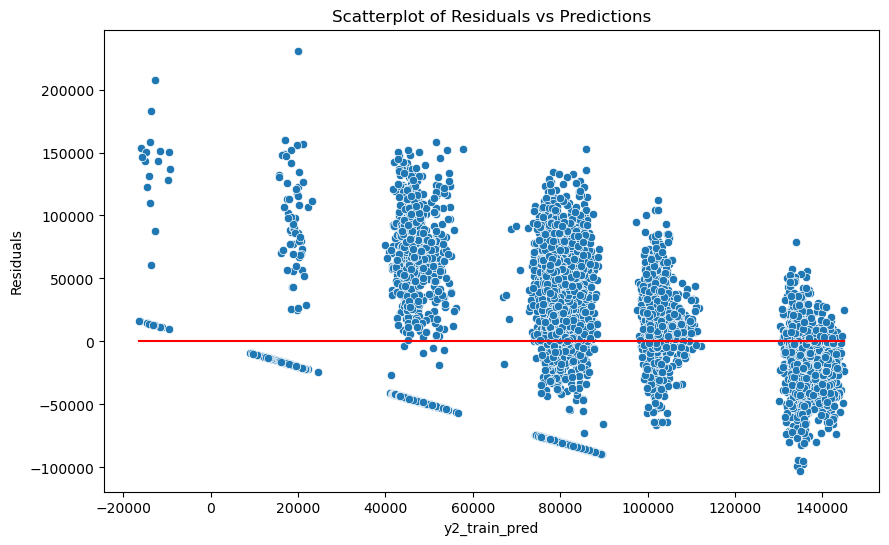

In [107]:
plt.figure(figsize=(10,6))

h = [[df_X2_line.y2_train_pred.min()],[df_X2_line.y2_train_pred.max()]]
w = [0,0]
plt.plot(h,w,color='red')
sns.scatterplot(data=df_X2_line, x="y2_train_pred", y="Errors")

plt.title("Scatterplot of Residuals vs Predictions")
plt.xlabel("y2_train_pred")
plt.ylabel("Residuals")
plt.show()

### 3) Normality (Residuals)

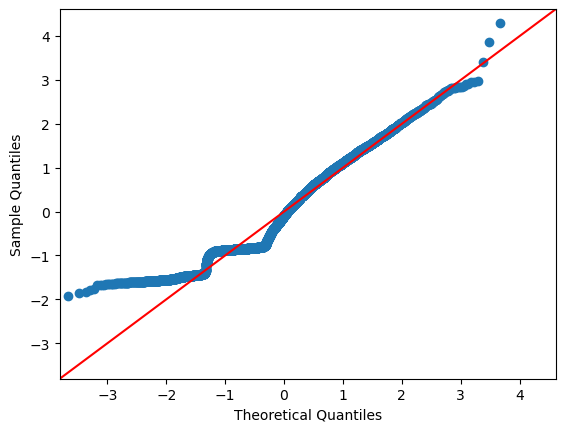

In [108]:
sm.qqplot(df_X2_line['Errors'], fit=True, line="45")
plt.show() 

In [109]:
stats.normaltest(df_X2_line['Errors'])

NormaltestResult(statistic=661.3801986529483, pvalue=2.4160985375929877e-144)

#### The p-value is less than the significance level (5%), so we reject the null hypothesis. This indicates that the residuals are not normally distributed, violating the normality assumption of linear regression.

### 4) Equal Variances (homoscedasticity)

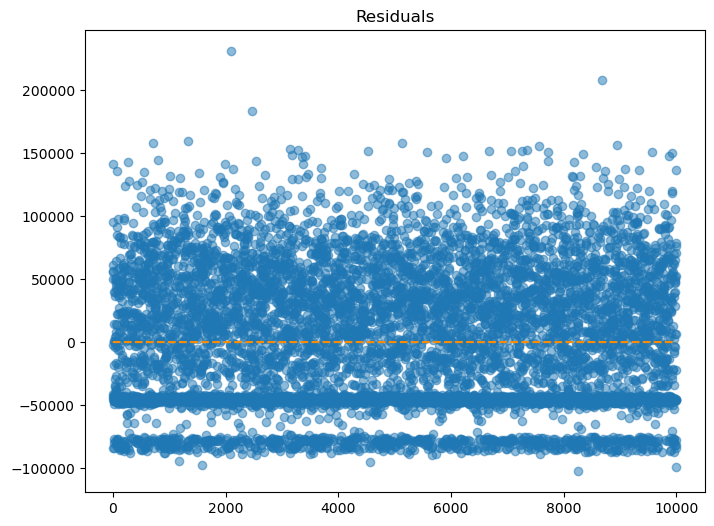

In [110]:
plt.figure(figsize=(8,6))

plt.scatter(x=df_X2_line.index, y=df_X2_line.Errors, alpha=0.5)
plt.plot(np.repeat(0, df_X2_line.index.max()), color='darkorange', linestyle='--')

plt.title('Residuals')
plt.show()  

In [111]:
# Levene's test for Equality of Variances
range_1 = df_X2_line[df_X2_line.index <= 5000]
range_2 = df_X2_line[df_X2_line.index > 5000]

In [112]:
stats.levene(range_1.Errors, range_2.Errors)

LeveneResult(statistic=0.5526765624667347, pvalue=0.45724794684991277)

#### The p-value is larger than the significance level (5%), so we fail to reject the null hypothesis. This indicates that the variances of the residuals are equal, satisfied the assumption of homoscedasticity.

### Conclusions: The __LINE__ assumptions (Linearity, Independence, Normality, and Equal Variance) for Multiple Linear Regression are violated based on the test results, suggesting that the model may not be suitable for accurate prediction with the given data.

### __Regression Tree__

In [86]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, shuffle=True, random_state=1, test_size=0.2)

In [87]:
X2_train.head()

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
2694,124749.08,3,0,354,2,1,2,0,True,False,True,False,True,False
5140,41104.82,4,0,838,2,0,1,0,False,False,False,False,True,False
2568,45750.21,6,1,705,1,1,4,1,True,False,False,False,True,False
3671,68367.18,6,0,234,2,1,1,0,True,False,False,False,False,False
7427,162515.17,8,0,504,1,0,5,0,False,True,True,False,False,False


In [88]:
scaler = StandardScaler()

In [89]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_train_scaled = pd.DataFrame(X2_train_scaled, index=X2_train.index, columns=X2_train.columns)
X2_train_scaled

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
2694,0.427394,-0.701742,-1.553374,-1.127709,0.802257,0.977259,-0.727810,-0.505268,1.714901,-0.572731,0.915091,-0.573694,1.717168,-0.577158
5140,-1.025487,-0.355203,-1.553374,1.012996,0.802257,-1.023271,-1.439604,-0.505268,-0.583124,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
2568,-0.944798,0.337876,0.643760,0.424745,-0.911510,0.977259,0.695779,1.979148,1.714901,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
3671,-0.551946,0.337876,-1.553374,-1.658462,0.802257,0.977259,-1.439604,-0.505268,1.714901,-0.572731,-1.092788,-0.573694,-0.582354,-0.577158
7427,1.083383,1.030954,-1.553374,-0.464267,-0.911510,-1.023271,1.407574,-0.505268,-0.583124,1.746019,0.915091,-0.573694,-0.582354,-0.577158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.579180,0.684415,0.643760,0.849347,-0.911510,0.977259,1.407574,-0.505268,1.714901,-0.572731,0.915091,-0.573694,-0.582354,-0.577158
7813,-0.529780,-0.701742,0.643760,1.154530,-0.911510,-1.023271,-0.727810,1.979148,1.714901,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
905,-0.140969,1.377494,0.643760,-0.937522,-0.911510,0.977259,-1.439604,1.979148,-0.583124,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
5192,0.017812,1.030954,0.643760,-0.725221,0.802257,0.977259,1.407574,-0.505268,-0.583124,-0.572731,-1.092788,-0.573694,-0.582354,1.732628


In [90]:
X2_test_scaled = scaler.transform(X2_test)
X2_test_scaled = pd.DataFrame(X2_test_scaled, index=X2_test.index,columns=X2_test.columns)
X2_test_scaled

,EstimatedSalary,Tenure,HasCrCard,PointEarned,NumOfProducts,IsActiveMember,SatisfactionScore,Complain,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
9953,-0.053606,-1.048281,0.643760,0.818387,0.802257,0.977259,-0.016015,-0.505268,-0.583124,-0.572731,0.915091,1.743090,-0.582354,-0.577158
3850,-0.583927,-0.701742,0.643760,0.376092,-0.911510,-1.023271,-1.439604,-0.505268,-0.583124,-0.572731,0.915091,-0.573694,-0.582354,1.732628
4962,-0.166853,-1.048281,-1.553374,-0.234274,0.802257,0.977259,-0.727810,-0.505268,-0.583124,-0.572731,-1.092788,1.743090,-0.582354,-0.577158
3886,-1.712344,1.030954,-1.553374,1.357986,0.802257,0.977259,1.407574,-0.505268,1.714901,-0.572731,0.915091,1.743090,-0.582354,-0.577158
5437,1.329642,0.337876,0.643760,0.327440,-0.911510,0.977259,-0.016015,-0.505268,1.714901,-0.572731,0.915091,1.743090,-0.582354,-0.577158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,-1.401474,0.684415,0.643760,-1.317895,0.802257,-1.023271,-0.727810,-0.505268,-0.583124,1.746019,-1.092788,-0.573694,1.717168,-0.577158
162,-0.920916,0.684415,-1.553374,1.088186,-0.911510,-1.023271,-0.016015,-0.505268,-0.583124,-0.572731,-1.092788,-0.573694,1.717168,-0.577158
7903,1.066997,1.724033,-1.553374,-0.964060,0.802257,0.977259,1.407574,-0.505268,-0.583124,1.746019,0.915091,-0.573694,-0.582354,-0.577158
2242,1.131013,-1.048281,0.643760,0.535318,0.802257,0.977259,-0.016015,-0.505268,1.714901,-0.572731,-1.092788,-0.573694,-0.582354,1.732628


In [91]:
dtr = DecisionTreeRegressor()
dtr.fit(X2_train_scaled,y2_train)

DecisionTreeRegressor()

In [92]:
y2_test_pred = dtr.predict(X2_test_scaled)

In [93]:
y2_test_pred

array([     0.  , 133853.27,  80107.83, ...,      0.  , 120074.97,
       138341.51])

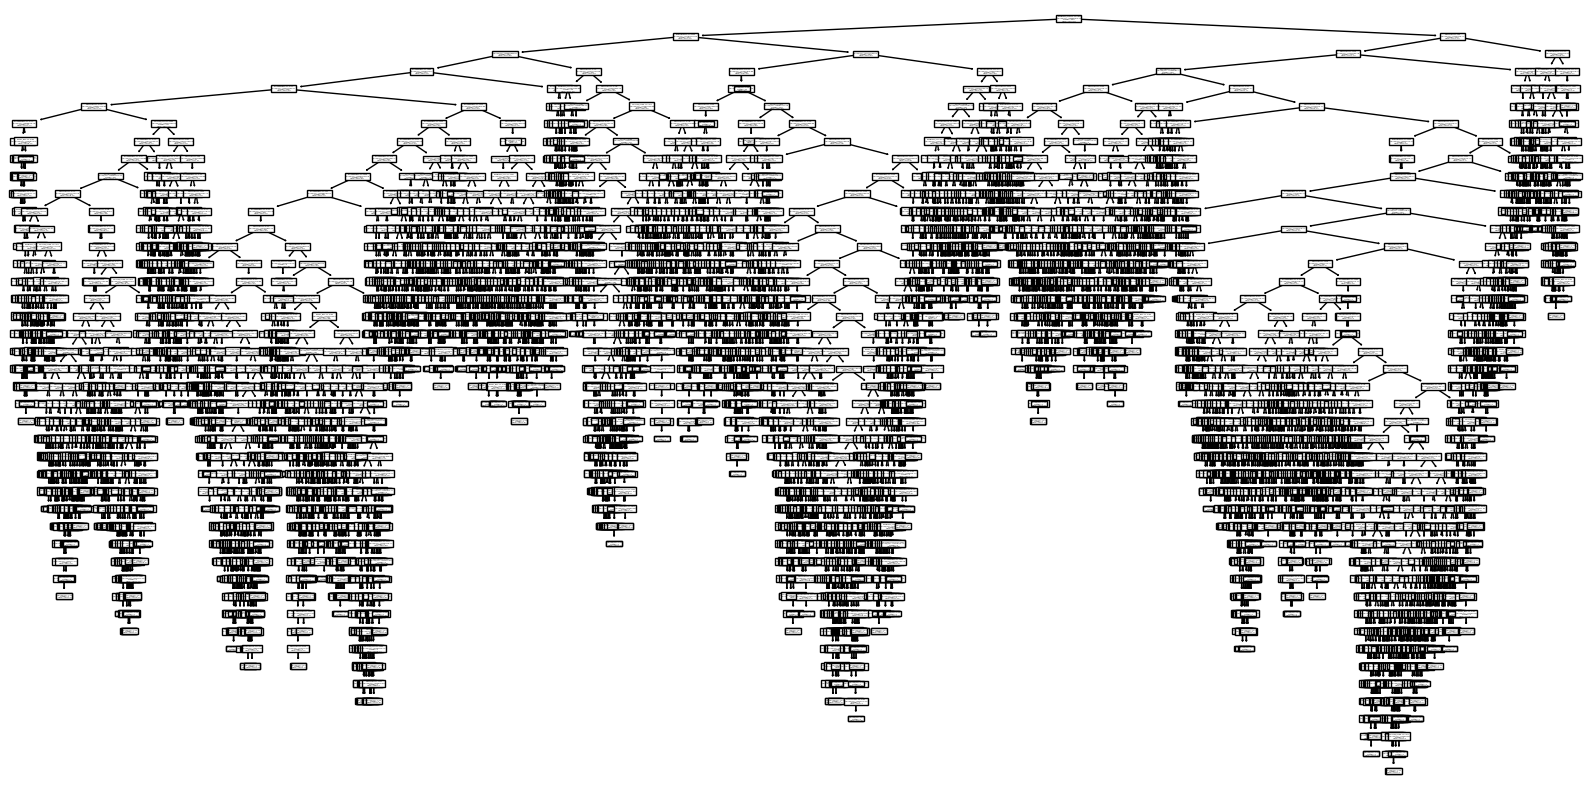

In [94]:
plt.figure(figsize=(20,10))
plot_tree(dtr, feature_names=X2_train_scaled.columns)

plt.show()

In [95]:
# Cross Validation Score:

crscore = cross_val_score(dtr, X2_train_scaled, y2_train, cv=5, scoring='r2')
print("R^2:", crscore.mean())

crscore1 = cross_val_score(dtr, X2_train_scaled, y2_train, cv=5, scoring='neg_mean_squared_error')
print("RMSE:", np.sqrt(np.mean(np.absolute(crscore1))))

R^2: -0.3422997757934867
RMSE: 71515.35943989789


In [96]:
y2_pred_train = dtr.predict(X2_train_scaled)
y2_pred_test = dtr.predict(X2_test_scaled)

train_score = mean_squared_error(y2_train, y2_pred_train)
train_r2 = r2_score(y2_train, y2_pred_train)

test_score = mean_squared_error(y2_test, y2_pred_test)
test_r2 = r2_score(y2_test, y2_pred_test)

print("Training Dataset:")
print("RMSE(Mean Squared Error):", np.sqrt(train_score))
print("R^2:", train_r2)
print('='*50)
print("Test Dataset:")
print("RMSE(Mean Squared Error):", np.sqrt(test_score))
print("R^2:", test_r2)

Training Dataset:
RMSE(Mean Squared Error): 0.0
R^2: 1.0
Test Dataset:
RMSE(Mean Squared Error): 73461.64656807632
R^2: -0.38168071031768824


### There is overfitting issue. The R² score for the Decision Tree Regressor is negative, meaning the model is doing worse than just predicting the average value of the target variable. In other words, the model's predictions add more error than if we had simply used the average for all predictions.

In [97]:
train_scores = []
train_r2s = []
test_scores = []
test_r2s = []

for i in range(1,16,1):
    DTR = DecisionTreeRegressor(max_depth=i)
    DTR.fit(X2_train_scaled, y2_train)
    y2_pred_train = DTR.predict(X2_train_scaled)
    y2_pred_test = DTR.predict(X2_test_scaled)

    train_score = mean_squared_error(y2_train, y2_pred_train)
    train_scores.append(train_score)
    train_r2 = r2_score(y2_train, y2_pred_train)
    train_r2s.append(train_r2)
    
    test_score = mean_squared_error(y2_test, y2_pred_test)
    test_scores.append(test_score)
    test_r2 = r2_score(y2_test, y2_pred_test)
    test_r2s.append(test_r2)

print("Training Dataset:")
print(train_scores)
print(train_r2s)
print('*'*140)
print("Test Dataset:")
print(test_scores)
print(test_r2s)

Training Dataset:
[3256254907.3605638, 2605737610.5118175, 2498609754.464328, 2483001562.969974, 2461875239.6468673, 2431043609.854986, 2382372944.9021854, 2319743761.2349086, 2241840544.520714, 2140931245.2111695, 2015995536.0157397, 1878112484.3410625, 1722838955.9028907, 1578341786.441531, 1449302228.2585118]
[0.16288374036906605, 0.3301183770470201, 0.3576587486420212, 0.36167129411375987, 0.36710243794713016, 0.37502861674577515, 0.3875408451057054, 0.4036415219466921, 0.4236688389855371, 0.4496105473600991, 0.48172895226126533, 0.5171758530009757, 0.5570934881504979, 0.594240742732234, 0.6274141629231478]
********************************************************************************************************************************************
Test Dataset:
[3308652177.91327, 2811046545.7442813, 2745057093.7513375, 2754237710.6530967, 2769100795.4268994, 2806188666.078495, 2848661145.3904233, 2898171814.748352, 2992192740.5815988, 3105628532.3610177, 3278140803.328245, 3405397561

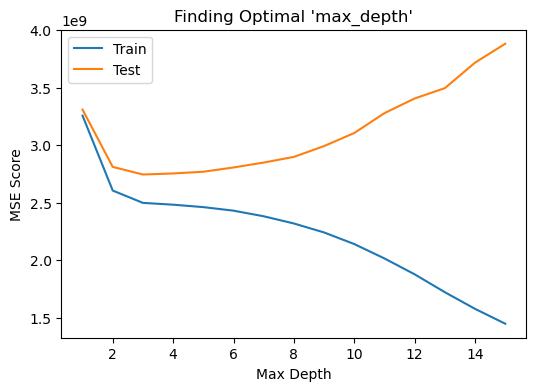

In [98]:
plt.figure(figsize=(6,4))
plt.plot(range(1,16,1), train_scores, label='Train')
plt.plot(range(1,16,1), test_scores, label='Test')

plt.xlabel("Max Depth")
plt.ylabel("MSE Score")
plt.title("Finding Optimal 'max_depth'")
plt.legend()
plt.show()

In [99]:
kfold_scores = []

for i in range(1,16,1):
    DTR = DecisionTreeRegressor(max_depth=i)
    kfold_score = cross_val_score(DTR, X2_train_scaled, y2_train, cv=5).mean()
    kfold_scores.append(kfold_score)

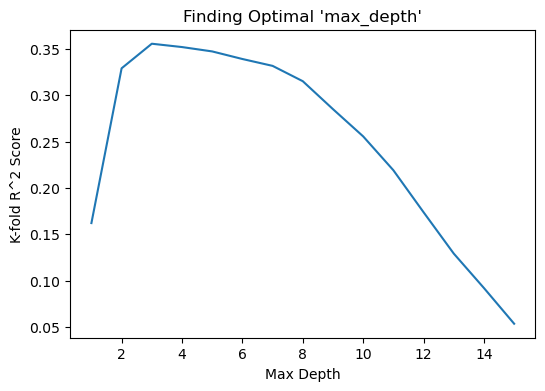

In [100]:
plt.figure(figsize=(6,4))
plt.plot(range(1,16,1), kfold_scores)

plt.xlabel("Max Depth")
plt.ylabel("K-fold R^2 Score")
plt.title("Finding Optimal 'max_depth'")
plt.show()

In [101]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X2_train_scaled,y2_train)

DecisionTreeRegressor(max_depth=3)

In [102]:
y2_test_pred = dtr.predict(X2_test_scaled)

In [103]:
y2_pred_train = dtr.predict(X2_train_scaled)
y2_pred_test = dtr.predict(X2_test_scaled)

train_score = mean_squared_error(y2_train, y2_pred_train)
train_r2 = r2_score(y2_train, y2_pred_train)

test_score = mean_squared_error(y2_test, y2_pred_test)
test_r2 = r2_score(y2_test, y2_pred_test)

print("Training Dataset:")
print("RMSE(Mean Squared Error):", np.sqrt(train_score))
print("R^2:", train_r2)
print('='*50)
print("Test Dataset:")
print("RMSE(Mean Squared Error):", np.sqrt(test_score))
print("R^2:", test_r2)

Training Dataset:
RMSE(Mean Squared Error): 49986.095611323035
R^2: 0.3576587486420212
Test Dataset:
RMSE(Mean Squared Error): 52393.29245000105
R^2: 0.2971902798735644


### The model shows significant improvement after pruning with max_depth=3. While the R² values are still not ideal, the gap between the training and test datasets has been reduced, indicating a better balance between fitting the data and generalizing to unseen data:

- #### Test Dataset: The RMSE is lower than before, indicating a reduction in prediction errors on the test dataset. The R² score has also improved, showing that the model's ability to generalize to unseen data is better, leading to more consistent performance across both datasets.

# Conclusions: 
### Both the Linear Regression and Decision Tree Regressor models struggle to accurately predict "Balance." However, the Decision Tree Regressor demonstrates better performance, with a higher accuracy score and reduced error after pruning. Despite this improvement, both models still leave room for optimization, indicating that additional tuning or feature engineering may be necessary to enhance predictive accuracy.